In [1]:
#Initialize Otter
import otter
grader = otter.Notebook("cs1090a_hw5.ipynb")

# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS1090A Introduction to Data Science: 
## Homework 5: Multiclass Classification & Decision Trees

**Harvard University**<br/>
**Fall 2024**<br/>
**Instructors**: Pavlos Protopapas and Natesh Pillai

<hr style="height:2.4pt">

In [2]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css"
).text
HTML(styles)

# 🎓 Predicting Student Outcomes 🕳️

In this assignment, you will construct and evaluate classification models to predict student outcomes (“Dropout,” “Enrolled,” or “Graduate”) using demographic, socio-economic, and academic data available at the point of enrollment. The aim is to identify students at risk and understand the factors contributing to their academic outcomes.

The dataset used in this assignment originates from the Polytechnic Institute of Portalegre, Portugal, and includes information such as demographics, socio-economic background, and academic history at the time of enrollment. The classification task involves predicting whether a student will graduate, remain enrolled, or drop out, which poses unique challenges, including class imbalance.

More information on the dataset and related modeling approaches can be found in the paper "Early Prediction of Student’s Performance in Higher Education: A Case Study" by Martins et al.. We have included a PDF of this paper in the data directory for your reference.

<div style = "background: orange; border: thin solid black; border-radius: 2px; padding: 5px">
<details>
<summary><strong>Dataset Information</strong> (click to expand)</summary>

| Variable Name                       | Description                                                                                                                                                                                                                             |
|-------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Marital Status                      | **1** – single, **2** – married, **3** – widower, **4** – divorced, **5** – facto union, **6** – legally separated                                                                                                                                              |
| Application mode                    | **1** - 1st phase - general contingent, **2** - Ordinance No. 612/93, **5** - 1st phase - special contingent (Azores Island), **7** - Holders of other higher courses, **10** - Ordinance No. 854-B/99, **15** - International student (bachelor), **16** - 1st phase - special contingent (Madeira Island), **17** - 2nd phase - general contingent, **18** - 3rd phase - general contingent, **26** - Ordinance No. 533-A/99, item b2) (Different Plan), **27** - Ordinance No. 533-A/99, item b3 (Other Institution), **39** - Over 23 years old, **42** - Transfer, **43** - Change of course, **44** - Technological specialization diploma holders, **51** - Change of institution/course, **53** - Short cycle diploma holders, **57** - Change of institution/course (International) |
| Application order                   | Application order (between **0** - first choice and **9** - last choice)                                                                                                                                                                        |
| Course                              | **33** - Biofuel Production Technologies, **171** - Animation and Multimedia Design, **8014** - Social Service (evening attendance), **9003** - Agronomy, **9070** - Communication Design, **9085** - Veterinary Nursing, **9119** - Informatics Engineering, **9130** - Equinculture, **9147** - Management, **9238** - Social Service, **9254** - Tourism, **9500** - Nursing, **9556** - Oral Hygiene, **9670** - Advertising and Marketing Management, **9773** - Journalism and Communication, **9853** - Basic Education, **9991** - Management (evening attendance) |
| Daytime/evening attendance          | **1** – daytime, **0** - evening                                                                                                                                                                                                                |
| Previous qualification              | **1** - Secondary education, **2** - Higher education - bachelor's degree, **3** - Higher education - degree, **4** - Higher education - master's, **5** - Higher education - doctorate, **6** - Frequency of higher education, **9** - 12th year of schooling - not completed, **10** - 11th year of schooling - not completed, **12** - Other - 11th year of schooling, **14** - 10th year of schooling, **15** - 10th year of schooling - not completed, **19** - Basic education 3rd cycle (9th/10th/11th year) or equiv., **38** - Basic education 2nd cycle (6th/7th/8th year) or equiv., **39** - Technological specialization course, **40** - Higher education - degree (1st cycle), **42** - Professional higher technical course, **43** - Higher education - master (2nd cycle) |
| Previous qualification (grade)      | Grade of previous qualification (between **0** and **200**)                                                                                                                                                                                      |
| Nationality                         | **1** - Portuguese, **2** - German, **6** - Spanish, **11** - Italian, **13** - Dutch, **14** - English, **17** - Lithuanian, **21** - Angolan, **22** - Cape Verdean, **24** - Guinean, **25** - Mozambican, **26** - Santomean, **32** - Turkish, **41** - Brazilian, **62** - Romanian, **100** - Moldova (Republic of), **101** - Mexican, **103** - Ukrainian, **105** - Russian, **108** - Cuban, **109** - Colombian |
| Mother's qualification              | **1** - Secondary Education - 12th Year of Schooling or Eq., **2** - Higher Education - Bachelor's Degree, **3** - Higher Education - Degree, **4** - Higher Education - Master's, **5** - Higher Education - Doctorate, **6** - Frequency of Higher Education, **9** - 12th Year of Schooling - Not Completed, **10** - 11th Year of Schooling - Not Completed, **11** - 7th Year (Old), **12** - Other - 11th Year of Schooling, **14** - 10th Year of Schooling, **18** - General commerce course, **19** - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv., **22** - Technical-professional course, **26** - 7th year of schooling, **27** - 2nd cycle of the general high school course, **29** - 9th Year of Schooling - Not Completed, **30** - 8th year of schooling, **34** - Unknown, **35** - Can't read or write, **36** - Can read without having a 4th year of schooling, **37** - Basic education 1st cycle (4th/5th year) or equiv., **38** - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv., **39** - Technological specialization course, **40** - Higher education - degree (1st cycle), **41** - Specialized higher studies course, **42** - Professional higher technical course, **43** - Higher Education - Master (2nd cycle), **44** - Higher Education - Doctorate (3rd cycle) |
| Father's qualification              | Similar values as Mother's qualification (refer to full details above)                                                                                                                                                                   |
| Mother's occupation                 | **0** - Student, **1** - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers, **2** - Specialists in Intellectual and Scientific Activities, **3** - Intermediate Level Technicians and Professions, **4** - Administrative staff, **5** - Personal Services, Security and Safety Workers and Sellers, **6** - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry, **7** - Skilled Workers in Industry, Construction and Craftsmen, **8** - Installation and Machine Operators and Assembly Workers, **9** - Unskilled Workers, **10** - Armed Forces Professions, **90** - Other Situation, **99** - (blank), **122** - Health professionals, **123** - teachers, **125** - Specialists in information and communication technologies (ICT), **131** - Intermediate level science and engineering technicians and professions, **132** - Technicians and professionals, of intermediate level of health, **134** - Intermediate level technicians from legal, social, sports, cultural and similar services, **141** - Office workers, secretaries in general and data processing operators, **143** - Data, accounting, statistical, financial services and registry-related operators, **144** - Other administrative support staff, **151** - personal service workers, **152** - sellers, **153** - Personal care workers and the like, **171** - Skilled construction workers and the like, except electricians, **173** - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like, **175** - Workers in food processing, woodworking, clothing and other industries and crafts, **191** - cleaning workers, **192** - Unskilled workers in agriculture, animal production, fisheries and forestry, **193** - Unskilled workers in extractive industry, construction, manufacturing and transport, **194** - Meal preparation assistants |
| Father's occupation                 | Similar values as Mother's occupation (refer to full details above)                                                                                                                                                                     |
| Admission grade                     | Admission grade (between **0** and **200**)                                                                                                                                                                                                     |
| Displaced                           | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Educational special needs           | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Debtor                              | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Tuition fees up to date             | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Gender                              | **1** – male, **0** – female                                                                                                                                                                                                                     |
| Scholarship holder                  | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Age at enrollment                   | Age of student at enrollment                                                                                                                                                                                                            |
| International                       | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Curricular units 1st sem (credited) | Number of curricular units credited in the 1st semester                                                                                                                                                                                  |
| Curricular units 1st sem (enrolled) | Number of curricular units enrolled in the 1st semester                                                                                                                                                                                  |
| Curricular units 1st sem (evaluations) | Number of evaluations to curricular units in the 1st semester                                                                                                                                                                            |
| Curricular units 1st sem (approved) | Number of curricular units approved in the 1st semester                                                                                                                                                                                  |
| Curricular units 1st sem (grade)    | Grade average in the 1st semester (between **0** and **20**)                                                                                                                                                                                     |
| Curricular units 1st sem (without evaluations) | Number of curricular units without evaluations in the 1st semester                                                                                                                                                                       |
| Curricular units 2nd sem (credited) | Number of curricular units credited in the 2nd semester                                                                                                                                                                                  |
| Curricular units 2nd sem (enrolled) | Number of curricular units enrolled in the 2nd semester                                                                                                                                                                                  |
| Curricular units 2nd sem (evaluations) | Number of evaluations to curricular units in the 2nd semester                                                                                                                                                                            |
| Curricular units 2nd sem (approved) | Number of curricular units approved in the 2nd semester                                                                                                                                                                                  |
| Curricular units 2nd sem (grade)    | Grade average in the 2nd semester (between **0** and **20**)                                                                                                                                                                                     |
| Curricular units 2nd sem (without evaluations) | Number of curricular units without evaluations in the 2nd semester                                                                                                                                                                       |
| Unemployment rate                   | Unemployment rate (%)                                                                                                                                                                                                                    |
| Inflation rate                      | Inflation rate (%)                                                                                                                                                                                                                       |
| GDP                                 | GDP                                                                                                                                                                                                                                      |
| Target                              | The problem is formulated as a three-category classification task: **dropout**, **enrolled**, or **graduate** at the end of the normal duration of the course                                                                                                                              |

</details>
</div>

<p>
<span style = "background: lightgreen; border: thin solid black; border-radius: 2px; padding: 5px">
<strong>Guidelines</strong>
</span>
</p>

This assignment is intentionally **open-ended**. You will not receive explicit instructions for every step—it is up to you to **make informed decisions** and **justify** them.

Consider every choice carefully, and support your decisions with **evidence** such as plots, metrics, or references to the literature.

The goal is to apply your data science expertise to a real-world problem where there may not be a single correct answer but rather multiple valid approaches that can be logically defended.

Feel free to add code and markdown cells as you need them. 

<span style = "background: lightgreen; border: thin solid black; border-radius: 2px; padding: 5px">
<strong>HW5 Overview</strong>
</span>

- EDA & General Preprocessing
- Model 1: OvR Logistic Regression
- Model 2: Decicion Tree Classifier
- Model 3: Custom Classifier
- Model Comparison & Kaggle Submissions
- Causal Inference (BONUS)
- Wrap-up

🏆 **Each of the 3 models has an associated Kaggle competition. Making it into the top 20 on any of the leaderboards will earn you bonus points.**

<span style = "background: violet; border: thin solid black; border-radius: 2px; padding: 5px">
<strong>Submission Requirements</strong>
</span>

- The notebook submitted to Canvas must **run from top to bottom** without errors and contain **all output**.
- Notebooks are intended for human readers. Prose should appear in markdown cells, not code comments.
- Notebooks should contain no excessive output and no non-functional code unless the latter is included with the expressive purpose of communicating something to the reader. 
- Predictions must be saved in the specified paths when the notebook is run to facilitate staff verification.
- Kaggle submissions whose performance cannot be reproduced by the appropriate model in the related notebook submission will be disqualified.

<p>
<span style = "background: red; border: thin solid black; border-radius: 2px; padding: 5px">
<strong>☣️ HW Submissions Copy-Pasted from Generative AI Output Will Receive No Credit ☣️</strong>
</span>
</p>



In [3]:
import os
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, cross_val_predict, \
                        GridSearchCV, RandomizedSearchCV, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, \
                            roc_curve, auc, roc_auc_score, precision_score, recall_score, f1_score



#additional libraries
import math
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import warnings
from sklearn.exceptions import ConvergenceWarning 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize


# pip install imblearn

# For optional causal inference section
# from psmpy import PsmPy
# from psmpy.functions import cohenD
# from psmpy.plotting import *

In [4]:
# For calculating total notebook runtime
notebook_start = time.time()

## EDA & General Preprocessing

Load and explore the dataset. Your EDA should help inform your later modeling decisions. 

**Hints:**

- Consider methods to handle class imbalance, feature scaling, categorical variable encoding, and any necessary feature engineering. Provide justification for the choice you make, including reasons for *not* taking certain actions that might be considered standard in the given context.
- You may decide that your different models require their own distinct preprocessing steps rather than taking a one-size-fits-all approach.
- Take a moment to look at the imports provided above. You may find these useful through the notebook.

---

#### Data Exploration

We started by exploring the dataset by checking its shape and data types. We found that there is no missing data in this dataset. The data consists of two types: integers and floats. For our initial analysis, we considered integers as discrete quantitative variables and floats as continuous quantitative variables. Using these groups, we created visualizations for exploratory data analysis (EDA).

However, we observed a data imbalance in the target variable. To address this, we applied SMOTE to balance the classes.

From the data dictionary and the EDA plots, we identified several features that needed to be removed. For example, the "Educational special needs" column was removed because 99% of the values were '0' (no), making it highly imbalanced and not very useful. Other features with similar issues that we decided to drop include 'Application order,' 'Previous qualification,' 'Nationality,' 'Educational special needs,' and 'International.'

Some features had too many categories, which could complicate the analysis and create a high number of new features when applying one-hot encoding. To simplify, we grouped less common categories together. For example, in the "Marital status" column, most values were '1' (single) or '2' (married), so we grouped the remaining categories as "others." A similar approach was used for features like "Father's occupation" and "Mother's occupation."  We dedicated one cell in the code for feature engineering.  

After feature engineering, we applied one-hot encoding to the categorical features. We decided not to scale 'GDP,' 'Inflation rate,' and 'Unemployment rate' because their distributions seemed more categorical than continuous, based on the plots. Instead, we categorized these three columns as discrete quantitative variables and included them in the one-hot encoding step. 

Most continuous variables showed no severe skewness, so we didn’t apply scaling or transformations. However, some variables, like 'Curricular units 1st sem (grade),' had a high concentration of values at zero. Even with skewness, we decided not to use transformations like Box-Cox because it wouldn’t significantly impact these distributions.

The final number of features are 82 after one-hot-encoder.



#### Data approach for each model

The data requirements differ for each model. OVR Logistic Regression requires more extensive preparation, including one-hot encoding categorical features and simplifying or removing features that may cause multicollinearity. In contrast, "decision trees" and "random forests", the models chosen for this homework, are non-parametric and do not require scaling or normalization, as they split data based on thresholds. Random forests, as ensembles of decision trees, share these properties but generally need more data to prevent overfitting. While logistic regression struggles with categorical variables unless one-hot encoded, decision trees and random forests can often handle them directly, depending on the implementation.

- The data used for OVR Logistic Regression comes from the feature engineering process, which includes removing certain features, applying one-hot encoding, and balancing the dataset using SMOTE.

- The data used for Decision Trees and Random Forests is the balanced dataset from SMOTE, with all features retained.

In [5]:
# load data

pd.set_option('display.max_columns', None)
xtrain = pd.read_csv('./data/X_train.csv')
xtest = pd.read_csv('./data/X_test.csv')
ytrain = pd.read_csv('./data/y_train.csv')

print('xtrain.shape:', xtrain.shape)
print('xtest.shape:', xtest.shape)
print('ytrain.shape:', ytrain.shape)

print('\nFirst few rows of xtrain:')
xtrain.head(5)
print('\nFirst few rows of ytrain:')
ytrain.head(5)

xtrain.dtypes


xtrain.shape: (3318, 36)
xtest.shape: (1106, 36)
ytrain.shape: (3318, 1)

First few rows of xtrain:

First few rows of ytrain:


Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nationality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [6]:
#Data sample
xtrain.head(5)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,1,6,9773,1,1,125.0,1,1,1,5,4,122.2,0,0,0,1,1,0,19,0,0,6,7,5,13.60,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06
1,1,17,2,9147,1,1,122.0,1,19,19,7,7,116.1,1,0,0,1,0,1,19,0,0,5,8,5,11.20,0,0,5,5,3,11.000000,0,12.4,0.5,1.79
2,1,17,3,9670,1,1,123.0,1,38,38,7,8,118.8,1,1,0,1,0,1,18,0,0,6,10,5,12.00,0,0,6,11,5,12.333333,0,11.1,0.6,2.02
3,1,39,1,9500,1,19,133.1,1,38,38,9,9,114.8,0,0,0,1,0,0,28,0,0,7,15,1,10.75,0,0,7,10,1,10.000000,0,13.9,-0.3,0.79
4,2,7,1,9254,1,2,100.0,1,37,37,9,9,100.0,0,0,0,0,0,0,37,0,0,5,5,0,0.00,0,0,5,10,0,0.000000,0,10.8,1.4,1.74


In [7]:
#Data sample

ytrain.head()


,Target
0,Graduate
1,Graduate
2,Graduate
3,Dropout
4,Dropout


In [8]:
#merge data to create plot
train = pd.concat([xtrain, ytrain], axis=1)

train.head(5)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,1,6,9773,1,1,125.0,1,1,1,5,4,122.2,0,0,0,1,1,0,19,0,0,6,7,5,13.60,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
1,1,17,2,9147,1,1,122.0,1,19,19,7,7,116.1,1,0,0,1,0,1,19,0,0,5,8,5,11.20,0,0,5,5,3,11.000000,0,12.4,0.5,1.79,Graduate
2,1,17,3,9670,1,1,123.0,1,38,38,7,8,118.8,1,1,0,1,0,1,18,0,0,6,10,5,12.00,0,0,6,11,5,12.333333,0,11.1,0.6,2.02,Graduate
3,1,39,1,9500,1,19,133.1,1,38,38,9,9,114.8,0,0,0,1,0,0,28,0,0,7,15,1,10.75,0,0,7,10,1,10.000000,0,13.9,-0.3,0.79,Dropout
4,2,7,1,9254,1,2,100.0,1,37,37,9,9,100.0,0,0,0,0,0,0,37,0,0,5,5,0,0.00,0,0,5,10,0,0.000000,0,10.8,1.4,1.74,Dropout


In [9]:
#Create the EDA based on type of the variable.  Continuous and Discrete

continuous_feature = xtrain.select_dtypes(include=['float64']).columns
discrete_feature = xtrain.select_dtypes(include=['int64']).columns
categorical_feature = xtrain.select_dtypes(include=['object']).columns

print("\nQuantitative Feature:", list(continuous_feature))

print("\nQuantitative Discrete Feature::", list(discrete_feature))

print("\nCategorical Feature::", list(categorical_feature))



Quantitative Feature: ['Previous qualification (grade)', 'Admission grade', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 'Unemployment rate', 'Inflation rate', 'GDP']

Quantitative Discrete Feature:: ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Nationality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular unit

In [10]:

# Checking xtrain
print(f'Xtrain Columns with at least one NaN value: {xtrain.isna().any(axis=0).sum()}')
print(f'Xtrain Rows with at least one NaN value: {xtrain.isna().any(axis=1).sum()}')

# Checking xtest
print(f'Xtest Columns with at least one NaN value: {xtest.isna().any(axis=0).sum()}')
print(f'Xtest Rows with at least one NaN value: {xtest.isna().any(axis=1).sum()}')

# Checking ytrain
if isinstance(ytrain, pd.DataFrame):
    ytrain_series = ytrain.squeeze()  # Convert DataFrame to Series if ytrain is a DataFrame
else:
    ytrain_series = ytrain  # If it's already a Series or array, use it directly

ytrain_series = pd.Series(ytrain_series, dtype="category")
print(f'Ytrain Rows with at least one NaN value: {ytrain_series.isna().sum()}')

# no missing data


Xtrain Columns with at least one NaN value: 0
Xtrain Rows with at least one NaN value: 0
Xtest Columns with at least one NaN value: 0
Xtest Rows with at least one NaN value: 0
Ytrain Rows with at least one NaN value: 0


#### EDA Plot

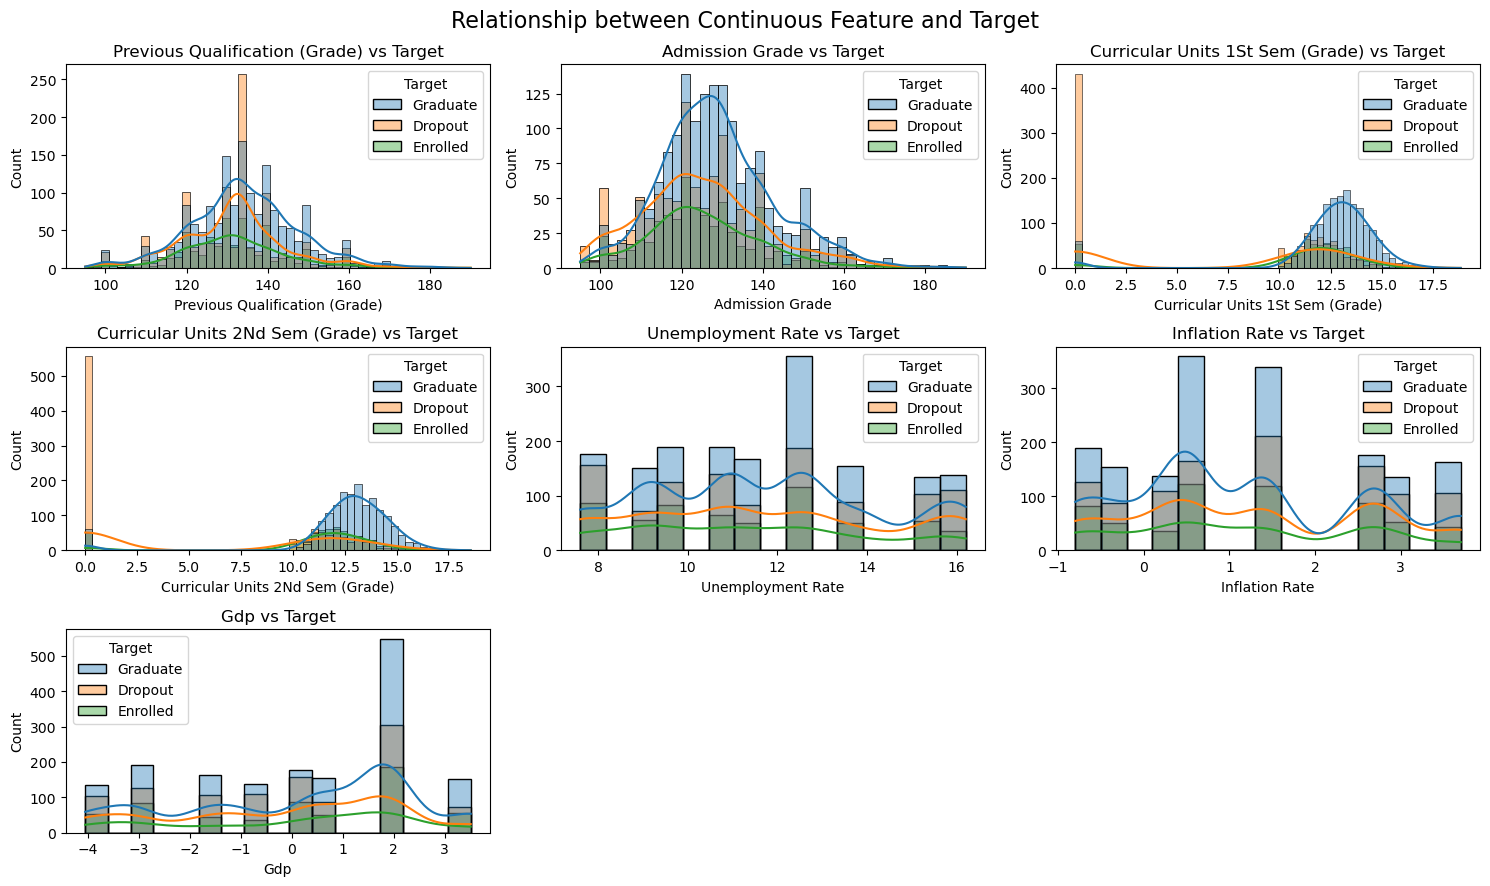

In [11]:
#Quantitative EDA plot (Pre-SMOTE data)

num_plots = len(continuous_feature)
cols = 3  
rows = math.ceil(num_plots / cols)

fig_width = 5 * cols
fig_height = 3 * rows
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(fig_width, fig_height))
fig.suptitle("Relationship between Continuous Feature and Target", fontsize=16)
axes = axes.ravel()


for ax, feature in zip(axes, continuous_feature):
    sns.histplot(data=train, x=feature, hue='Target', ax=ax, kde=True, alpha=0.4)  
    ax.set_title(f'{feature.replace("_", " ").title()} vs Target')
    ax.set_xlabel(feature.replace("_", " ").title())


for i in range(num_plots, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

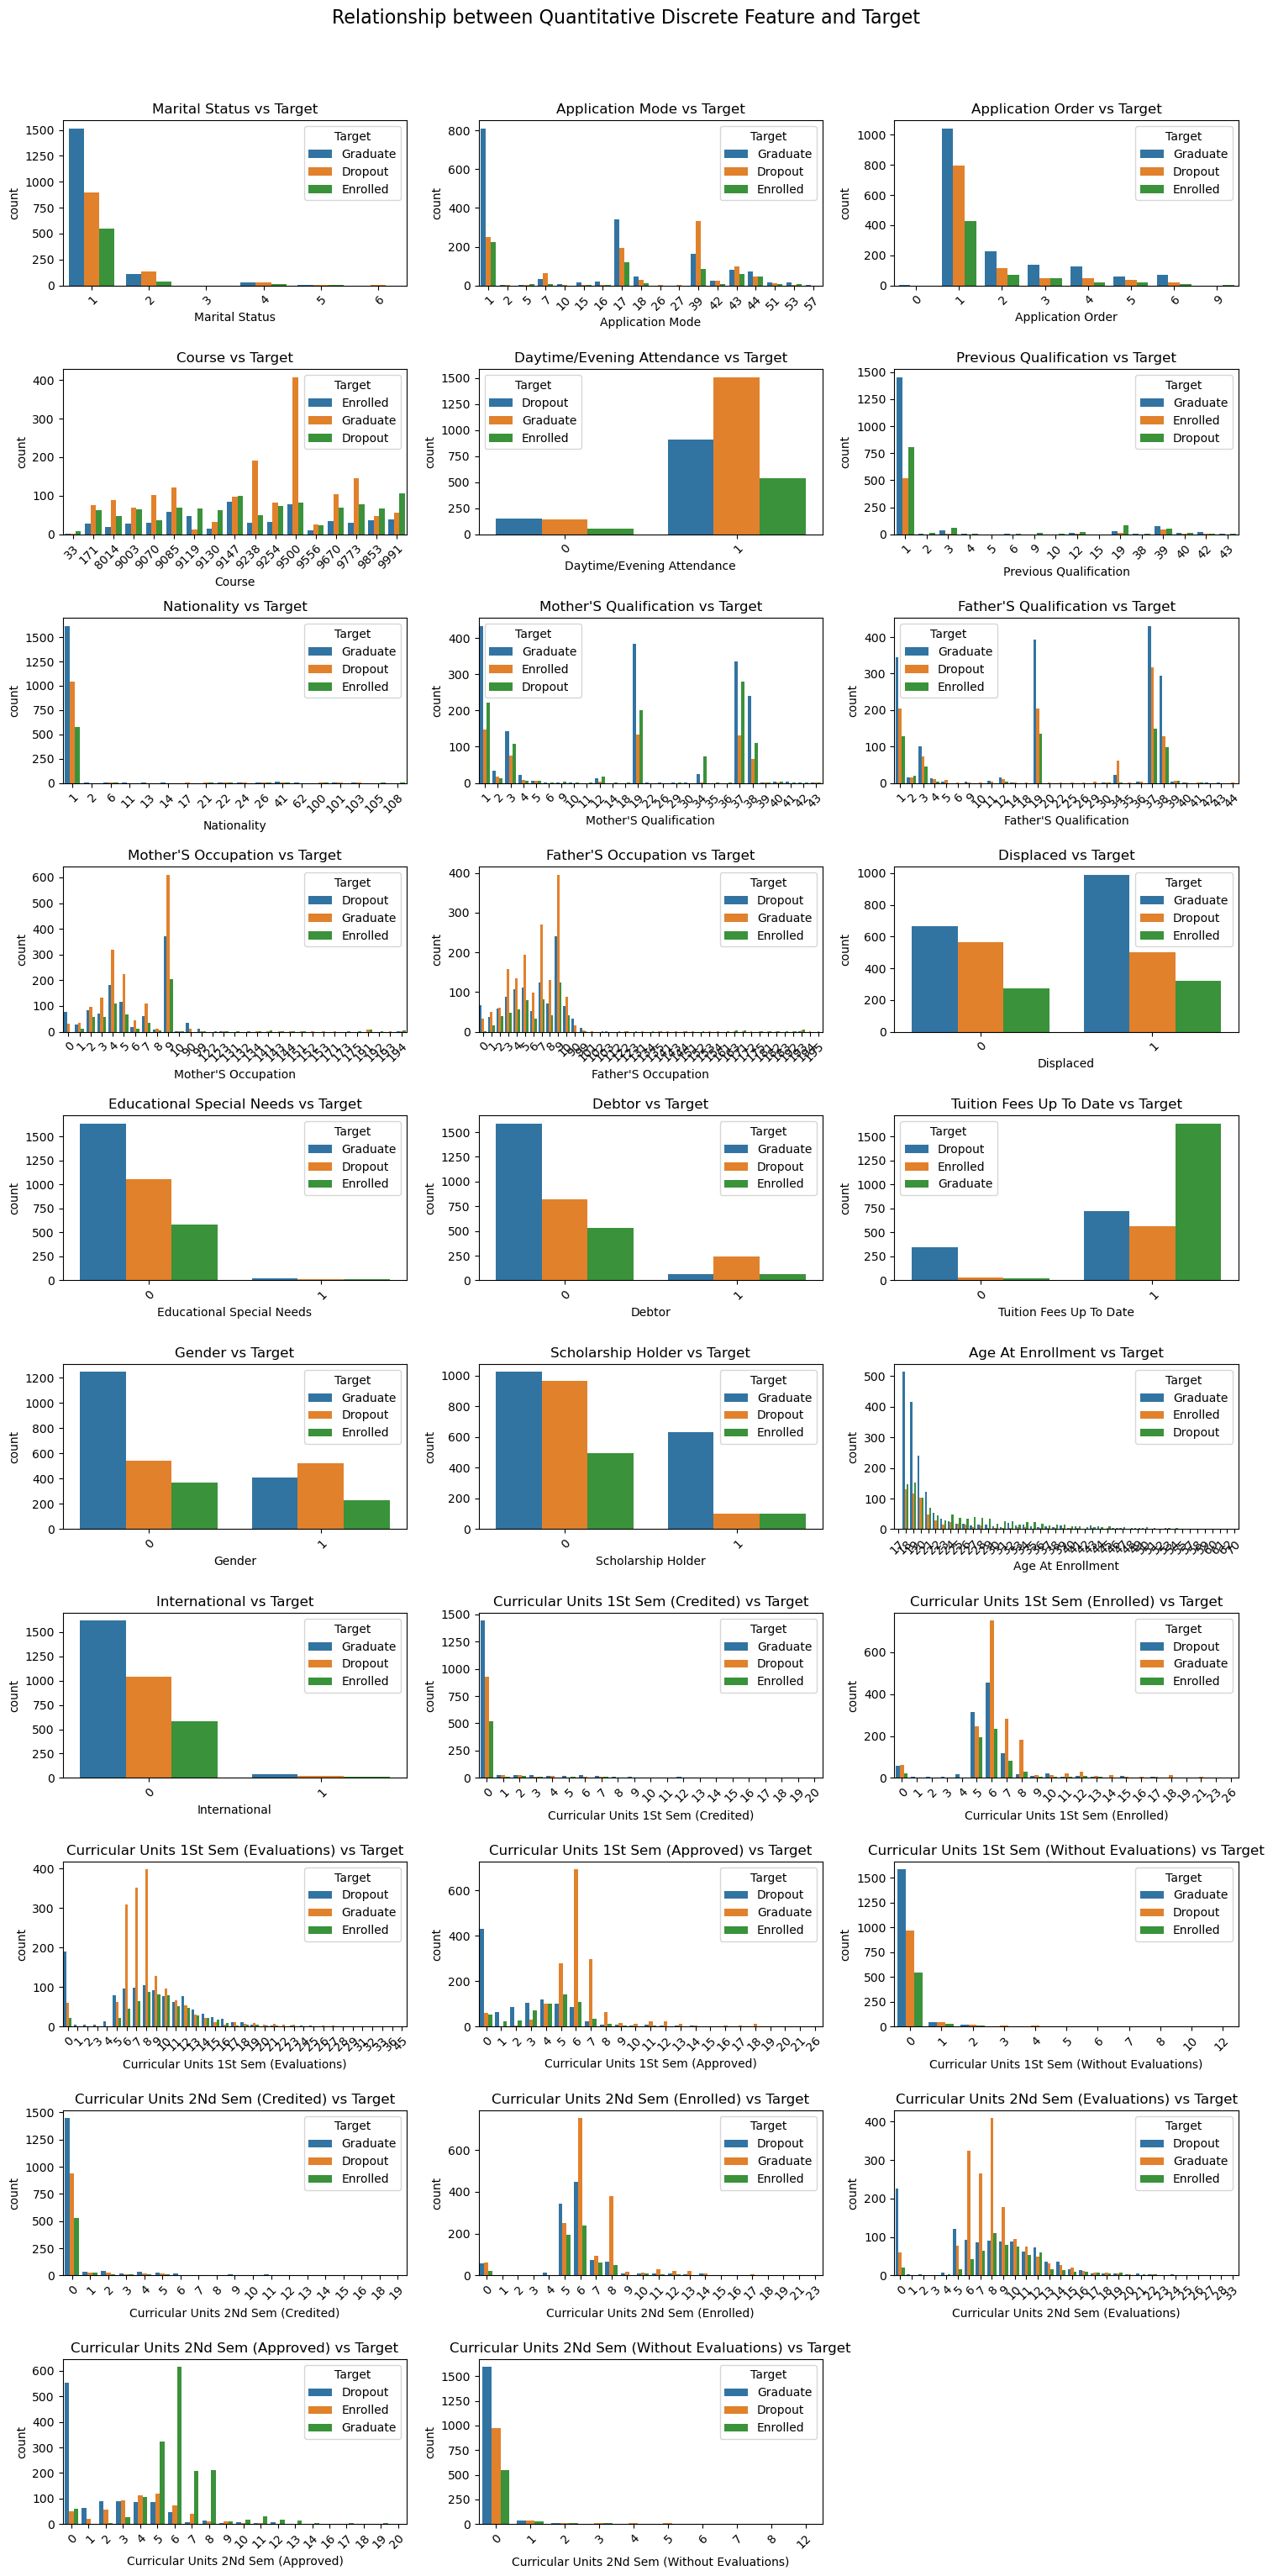

In [12]:
#Quantitative Discrete Feature plot (Pre-SMOTE)

num_plots = len(discrete_feature)
cols = 3  
rows = math.ceil(num_plots / cols)

fig_width = 5 * cols
fig_height = 3 * rows
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(fig_width, fig_height))
fig.suptitle("Relationship between Quantitative Discrete Feature and Target", fontsize=16,y=1.02)
axes = axes.ravel()


for ax, feature in zip(axes, discrete_feature):
    sns.countplot(data=train, x=feature, hue='Target', ax=ax)  
    ax.set_title(f'{feature.replace("_", " ").title()} vs Target')
    ax.set_xlabel(feature.replace("_", " ").title())
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")


for i in range(num_plots, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

#### Data Handling - Imbalance data

There are 2 parts of data balancing using SMOTE here
1. xtrain/ytrain -> (apply SMOTE) -> xtrain_resampled_df/ytrain_resampled_df      (This output is for Decision Tree and Randon forest)
2. xtrain - > Feature Engineering -> OnehotEncoding on catgorical -> Balancing using SMOTE   -> xtrain_resampled_df1/ytrain_resampled_df1  (This output is for OVR Logistic Regression)



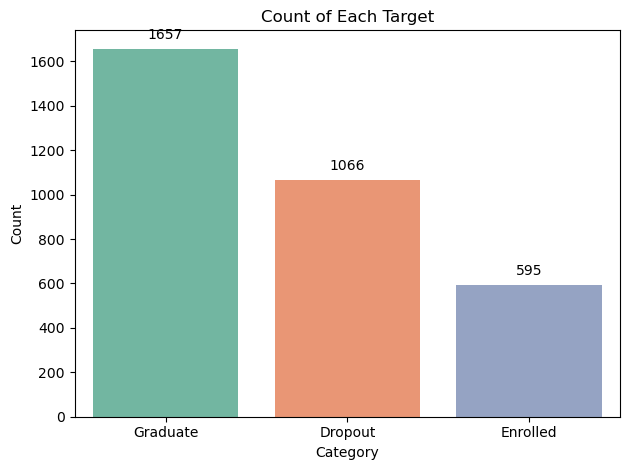

In [13]:
#Check data imbalance - Graduate is much higher than other classes

sns.countplot(data=ytrain,x='Target',hue = 'Target',palette = 'Set2')
plt.title("Count of Each Target")
plt.xlabel("Category")
plt.ylabel("Count")

for p in plt.gca().patches:
    plt.gca().annotate(
        f'{int(p.get_height())}',  
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
        textcoords='offset points'  
    )
plt.tight_layout()
plt.show()


In [14]:
#using SMOTE to balance the data. 
#Apply label encoder to ytrain first to prevent SMOTE mishandled data and add NAN 

label_encoder = LabelEncoder()
ytrain_encoded = label_encoder.fit_transform(ytrain)

smote = SMOTE(sampling_strategy='auto',random_state=109)
xtrain_resampled, ytrain_resampled = smote.fit_resample(xtrain, ytrain_encoded)

# Decode resampled labels back to original categories
ytrain_resampled = label_encoder.inverse_transform(ytrain_resampled)

# Convert resampled data into DataFrames for later use. 
# This one will be used for decision tree and random forest
xtrain_resampled_df = pd.DataFrame(xtrain_resampled, columns=xtrain.columns)  
ytrain_resampled_df = pd.DataFrame(ytrain_resampled, columns=['target'])

print("Before SMOTE:", ytrain.value_counts())
print("\nAfter SMOTE:",ytrain_resampled_df.groupby('target').size())

#Verify data make sure non NAN
print(f'ytrain_resampled Columns with NaN value: {ytrain_resampled_df.isna().any(axis=0).sum()}')



c:\Users\fahja\micromamba\envs\cs109a\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Before SMOTE: Target  
Graduate    1657
Dropout     1066
Enrolled     595
Name: count, dtype: int64

After SMOTE: target
Dropout     1657
Enrolled    1657
Graduate    1657
dtype: int64
ytrain_resampled Columns with NaN value: 0


In [15]:
ytrain_resampled_df.head()

,target
0,Graduate
1,Graduate
2,Graduate
3,Dropout
4,Dropout


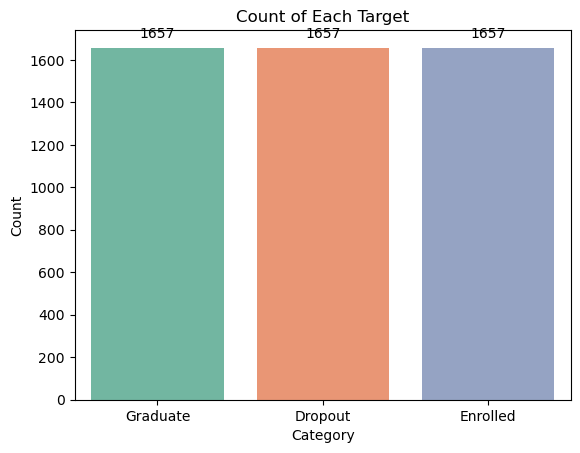

In [16]:
#Post SMOTE

sns.countplot(data=ytrain_resampled_df,x='target',hue ='target',palette = 'Set2')
plt.title("Count of Each Target")
plt.xlabel("Category")
plt.ylabel("Count")

for p in plt.gca().patches:
    plt.gca().annotate(
        f'{int(p.get_height())}',  
        (p.get_x() + p.get_width() / 2., p.get_height()),  
        ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
        textcoords='offset points'  
    )
plt.show()

### Feature Engineering


From the data dictionary and the EDA plots, we identified several features that needed to be removed. For example, the "Educational special needs" column was removed because 99% of the values were '0' (no), making it highly imbalanced and not very useful. Other features with similar issues that we decided to drop include 'Application order,' 'Previous qualification,' 'Nationality,' 'Educational special needs,' and 'International.'

Some features had too many categories, which could complicate the analysis and create a high number of new features when applying one-hot encoding. To simplify, we grouped less common categories together. For example, in the "Marital status" column, most values were '1' (single) or '2' (married), so we grouped the remaining categories as "others." A similar approach was used for features like "Father's occupation" and "Mother's occupation."  We dedicated the cell below for feature engineering.  

In [17]:
#Feature Engineering - remove and simplified features

def preprocess_student_data(df):
    df_processed = df.copy()
    
    # Simplify Marital Status 
    marital_status_map = {
        'Single': 'Single',
        'Married': 'Married'
    }
    df_processed['Marital status'] = df_processed['Marital status'].apply(
        lambda x: marital_status_map.get(x, 'Others')
    )

    # Simplify Application Mode 
    keep_modes = [1, 17, 39, 43, 44, 51]
    df_processed['Application mode'] = df_processed['Application mode'].apply(
        lambda x: str(x) if x in keep_modes else 'Others' 
    )
    
    # Drop specified columns
    columns_to_drop = [
        'Application order',
        'Previous qualification',
        'Nationality',
        'Educational special needs',
        'International'
    ]
    df_processed = df_processed.drop(columns=columns_to_drop, errors='ignore')
    
    # Parents' qualifications
    def simplify_qualification(x):
        higher_ed_codes = [2, 3, 4, 5, 40, 41, 42, 43, 44]
        if pd.isna(x):
            return "Unknown"
        elif x in higher_ed_codes:
            return "With Degree"
        else:
            return "Without Degree"
    
    df_processed["Mother's qualification"] = df_processed["Mother's qualification"].apply(simplify_qualification)
    df_processed["Father's qualification"] = df_processed["Father's qualification"].apply(simplify_qualification)
    
    
    # Simplify Mother's and Father's occupations
    occupation_mapping = {
        9: "Unskilled",
        192: "Unskilled",
        193: "Unskilled",
        194: "Unskilled",
        191: "Unskilled",
        153: "Unskilled",
        3: "Skilled",
        7: "Skilled",
        8: "Skilled",
        173: "Skilled",
        175: "Skilled",
        132: "Skilled",
        131: "Skilled",
        134: "Skilled",
        4: "Office",
        141: "Office",
        143: "Office",
        144: "Office",
        1: "Professional",
        2: "Professional",
        122: "Professional",
        123: "Professional",
        125: "Professional",
        0: "Other",
        10: "Other",
        90: "Other",
        99: "Other"
    }

    # Apply remapping to Mother's occupation & Father's occupation
    df_processed["Mother's occupation"] = df_processed["Mother's occupation"].apply(
        lambda x: occupation_mapping.get(x, "Other or Undefined Jobs"))
    
    df_processed["Father's occupation"] = df_processed["Father's occupation"].apply(
        lambda x: occupation_mapping.get(x, "Other or Undefined Jobs"))



    # rearrange age to 3 groups
    def bin_age(age):
        if age < 20:
            return 'Below 20'
        elif 20 <= age <= 30:
            return '20-30'
        else:
            return 'Above 30'
    
    df_processed['Age at enrollment'] = df_processed['Age at enrollment'].apply(bin_age)



    # Convert other categorical columns to string type
    # for col in ['Course', 'Daytime/evening attendance', 'Displaced']:
    # df_processed[col] = df_processed[col].astype(str)

    return df_processed

xtrain_post_removed = preprocess_student_data(xtrain)
xtest_post_removed = preprocess_student_data(xtest)



In [18]:
#Perform One hot encoding on categorical data


categorical_features = ['Marital status', 'Application mode', 'Course', 
                       "Mother's qualification", "Father's qualification", 
                       "Mother's occupation", "Father's occupation", "Age at enrollment",'GDP','Unemployment rate','Inflation rate']

xtrain_post_removed_nocat = xtrain_post_removed.drop(columns=categorical_features)
xtest_post_removed_nocat = xtest_post_removed.drop(columns=categorical_features)

ohe = OneHotEncoder(drop='first', sparse_output=False)
ohe_matrix_train = ohe.fit_transform(xtrain_post_removed[categorical_features])
ohe_matrix_test = ohe.fit_transform(xtest_post_removed[categorical_features])

#create ohe dataframe
df_ohe_train = pd.DataFrame(ohe_matrix_train, columns=ohe.get_feature_names_out())
df_ohe_test = pd.DataFrame(ohe_matrix_test, columns=ohe.get_feature_names_out())

#merge back
x_train_post_encoded = pd.concat([xtrain_post_removed_nocat,df_ohe_train],axis=1)
x_test_post_encoded = pd.concat([xtest_post_removed_nocat,df_ohe_test],axis=1)


In [19]:
print("Reconstructed DataFrame:")
x_train_post_encoded.head(5)

Reconstructed DataFrame:


,Daytime/evening attendance,Previous qualification (grade),Admission grade,Displaced,Debtor,Tuition fees up to date,Gender,Scholarship holder,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Application mode_17,Application mode_39,Application mode_43,Application mode_44,Application mode_51,Application mode_Others,Course_171,Course_8014,Course_9003,Course_9070,Course_9085,Course_9119,Course_9130,Course_9147,Course_9238,Course_9254,Course_9500,Course_9556,Course_9670,Course_9773,Course_9853,Course_9991,Mother's qualification_Without Degree,Father's qualification_Without Degree,Mother's occupation_Other,Mother's occupation_Other or Undefined Jobs,Mother's occupation_Professional,Mother's occupation_Skilled,Mother's occupation_Unskilled,Father's occupation_Other,Father's occupation_Other or Undefined Jobs,Father's occupation_Professional,Father's occupation_Skilled,Father's occupation_Unskilled,Age at enrollment_Above 30,Age at enrollment_Below 20,GDP_-3.12,GDP_-1.7,GDP_-0.92,GDP_0.32,GDP_0.79,GDP_1.74,GDP_1.79,GDP_2.02,GDP_3.51,Unemployment rate_8.9,Unemployment rate_9.4,Unemployment rate_10.8,Unemployment rate_11.1,Unemployment rate_12.4,Unemployment rate_12.7,Unemployment rate_13.9,Unemployment rate_15.5,Unemployment rate_16.2,Inflation rate_-0.3,Inflation rate_0.3,Inflation rate_0.5,Inflation rate_0.6,Inflation rate_1.4,Inflation rate_2.6,Inflation rate_2.8,Inflation rate_3.7
0,1,125.0,122.2,0,0,1,1,0,0,6,7,5,13.60,0,0,6,8,5,12.666667,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,122.0,116.1,1,0,1,0,1,0,5,8,5,11.20,0,0,5,5,3,11.000000,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,123.0,118.8,1,0,1,0,1,0,6,10,5,12.00,0,0,6,11,5,12.333333,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,133.1,114.8,0,0,1,0,0,0,7,15,1,10.75,0,0,7,10,1,10.000000,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,100.0,100.0,0,0,0,0,0,0,5,5,0,0.00,0,0,5,10,0,0.000000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [20]:
print("Shape of x_train_processed:", x_train_post_encoded.shape)
print("Shape of x_test_processed:", x_test_post_encoded.shape)

Shape of x_train_processed: (3318, 82)
Shape of x_test_processed: (1106, 82)


In [21]:
#Balance post Feature engineering using SMOTE

ytrain_df = pd.DataFrame(ytrain, columns=['Target'])

# Encode the target variable
label_encoder = LabelEncoder()
ytrain_encoded = label_encoder.fit_transform(ytrain_df['Target'])  

# Apply SMOTE for oversampling on the post feature engineering + onehot encoding data
smote = SMOTE(sampling_strategy='auto')
xtrain_resampled1, ytrain_resampled1 = smote.fit_resample(x_train_post_encoded, ytrain_encoded)

# Convert resampled data into DataFrames

if isinstance(x_train_post_encoded, pd.DataFrame):
    xtrain_resampled_df1 = pd.DataFrame(xtrain_resampled1, columns=x_train_post_encoded.columns)
else:
    xtrain_resampled_df1 = pd.DataFrame(xtrain_resampled1)





# Convert ytrain_resampled to a DataFrame
ytrain_resampled_df1 = pd.DataFrame(ytrain_resampled1, columns=['target'])

# Check class distribution before and after SMOTE
print("Before SMOTE:", ytrain_df['Target'].value_counts())
print("\nAfter SMOTE:", ytrain_resampled_df1['target'].value_counts())

# no NaN values
print(f'ytrain_resampled Columns with NaN value: {ytrain_resampled_df1.isna().any(axis=0).sum()}')



Before SMOTE: Target
Graduate    1657
Dropout     1066
Enrolled     595
Name: count, dtype: int64

After SMOTE: target
2    1657
0    1657
1    1657
Name: count, dtype: int64
ytrain_resampled Columns with NaN value: 0


In [22]:
xtrain_resampled_df1.head()

,Daytime/evening attendance,Previous qualification (grade),Admission grade,Displaced,Debtor,Tuition fees up to date,Gender,Scholarship holder,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Application mode_17,Application mode_39,Application mode_43,Application mode_44,Application mode_51,Application mode_Others,Course_171,Course_8014,Course_9003,Course_9070,Course_9085,Course_9119,Course_9130,Course_9147,Course_9238,Course_9254,Course_9500,Course_9556,Course_9670,Course_9773,Course_9853,Course_9991,Mother's qualification_Without Degree,Father's qualification_Without Degree,Mother's occupation_Other,Mother's occupation_Other or Undefined Jobs,Mother's occupation_Professional,Mother's occupation_Skilled,Mother's occupation_Unskilled,Father's occupation_Other,Father's occupation_Other or Undefined Jobs,Father's occupation_Professional,Father's occupation_Skilled,Father's occupation_Unskilled,Age at enrollment_Above 30,Age at enrollment_Below 20,GDP_-3.12,GDP_-1.7,GDP_-0.92,GDP_0.32,GDP_0.79,GDP_1.74,GDP_1.79,GDP_2.02,GDP_3.51,Unemployment rate_8.9,Unemployment rate_9.4,Unemployment rate_10.8,Unemployment rate_11.1,Unemployment rate_12.4,Unemployment rate_12.7,Unemployment rate_13.9,Unemployment rate_15.5,Unemployment rate_16.2,Inflation rate_-0.3,Inflation rate_0.3,Inflation rate_0.5,Inflation rate_0.6,Inflation rate_1.4,Inflation rate_2.6,Inflation rate_2.8,Inflation rate_3.7
0,1,125.0,122.2,0,0,1,1,0,0,6,7,5,13.60,0,0,6,8,5,12.666667,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,122.0,116.1,1,0,1,0,1,0,5,8,5,11.20,0,0,5,5,3,11.000000,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,123.0,118.8,1,0,1,0,1,0,6,10,5,12.00,0,0,6,11,5,12.333333,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,133.1,114.8,0,0,1,0,0,0,7,15,1,10.75,0,0,7,10,1,10.000000,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,100.0,100.0,0,0,0,0,0,0,5,5,0,0.00,0,0,5,10,0,0.000000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [23]:
ytrain_resampled_df1.head()


,target
0,2
1,2
2,2
3,0
4,0


<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

## Model 1: OvR Logistic Regression

Develop a One-vs-Rest Logistic Regression model to predict student outcomes. You are expected to perform model selection, tuning, evaluation, and interpretation.

**Instructions**:
1. **Model Selection & Training**
   - Train an **OvR Logistic Regression** model using appropriate hyperparameter tuning methods (e.g., cross-validation).
   - Explain and justify all modeling decisions, including any feature preprocessing, engineering, and/or selection, hyperparameter tuning, and regularization choices.

2. **Prediction Generation**
   - Generate predictions for the test dataset in `./data/X_test.csv`.
   - Save your predictions in the following file path: `./submissions/submission_logreg.csv`.
   - Follow the structure of the expected submission file provided in `./data/example_submissions/example_submission_logreg.csv`.

3. **Feature Importance & Interpretation**
   - Analyze and interpret the feature importance in your logistic regression model.
   - Provide visualizations and explanations to support your interpretations (e.g., coefficients of significant predictors).

**Kaggle Competition Link**: [Logistic Regression Kaggle Competition](https://www.kaggle.com/t/8e1458a396f54accb532b6afa535a8a9)

**Kaggle Rules Summary**:
- You **must use an OvR Logistic Regression model**.
- No additional data beyond what was distributed with the assignment may be used (data derived from the provided dataset is allowed).
- Submissions will be **disqualified** if their performance cannot be reproduced by the relevant model in your notebook.

---

#### Explanation of baseline model and improved model

The exploration begins with the development of a baseline logistic regression model using the xtrain and ytrain datasets. This initial model is created without any feature engineering or one-hot encoding, applying all available variables to construct the model. 

The baseline model is then evaluated using standard metrics, including a classification report (precision, recall, F1 score, and accuracy), as well as the ROC curve and AUC score for comprehensive performance insights. 

Following this, an improved model is developed using balanced data and preprocessing techniques, such as one-hot encoding and dropping unimportant variables. 

The improved model incorporates hyperparameter tuning with a grid search technique and cross-validation to optimize performance. Finally, the baseline and improved models are compared in terms of precision, F1 score, accuracy, and AUC to provide a detailed understanding of their relative effectiveness and improvements.

In [68]:
#baseline model
# we use xtrain and ytrain 

# build the model
base_model = OneVsRestClassifier(LogisticRegression(max_iter=100, random_state = 109,solver='saga'))
base_model.fit(xtrain, ytrain)

#use best moddel & xtrain_resampled_df1 data to see classification report
y_train_pred_base_model = base_model.predict(xtrain)

print("Classification Report on Training Data:")
print(classification_report(ytrain, y_train_pred_base_model
                            , target_names=label_encoder.classes_))

Classification Report on Training Data:
              precision    recall  f1-score   support

     Dropout       0.89      0.21      0.34      1066
    Enrolled       1.00      0.01      0.01       595
    Graduate       0.54      0.99      0.70      1657

    accuracy                           0.57      3318
   macro avg       0.81      0.40      0.35      3318
weighted avg       0.74      0.57      0.46      3318



#### Top 10 important features of base model

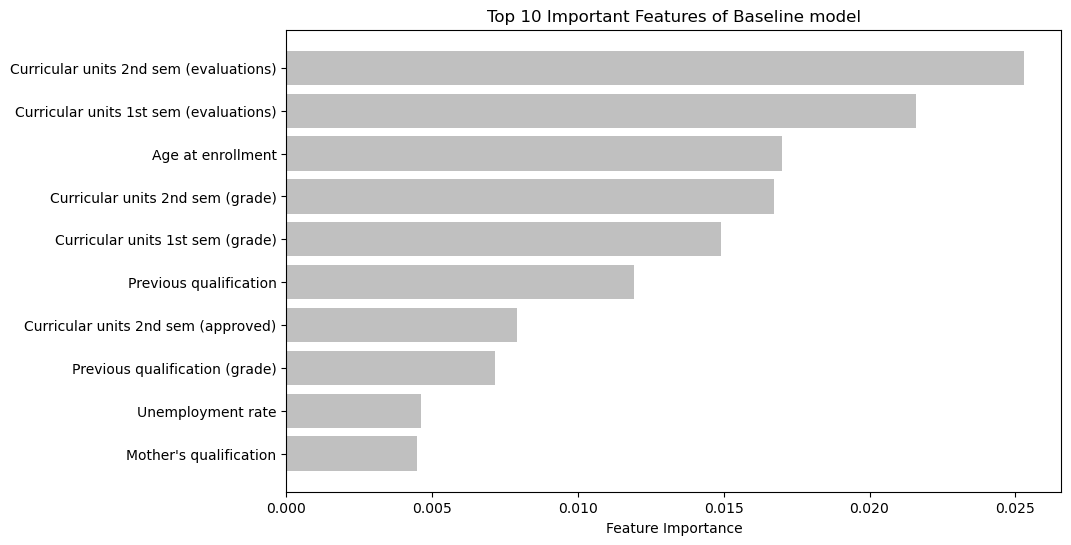

In [25]:
#feature names 
feature_names = xtrain.columns if isinstance(xtrain, pd.DataFrame) else [f'feature_{i}' for i in range(xtrain.shape[1])]

# Average feature coefficients 
avg_coefficients = np.mean([estimator.coef_[0] for estimator in base_model.estimators_], axis=0)

# Create a df with feature names and their coefficients
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': avg_coefficients})
feature_importance_df['Importance'] = feature_importance_df['Importance'].abs()

# Sorting
top_10= feature_importance_df.sort_values(by='Importance', ascending=False).head(10)


plt.figure(figsize=(10, 6))
plt.barh(top_10['Feature'], top_10['Importance'], color='silver')
plt.xlabel('Feature Importance')
plt.title('Top 10 Important Features of Baseline model')
plt.gca().invert_yaxis()  


In [26]:

#Improve model using grid search

best_model = None

warnings.filterwarnings("ignore", category=ConvergenceWarning)

grid = {
    'estimator__C': [0.0001,0.001,0.01, 0.1, 1, 10],  
    'estimator__penalty': ['l1','l2'],  
    'estimator__solver': ['saga',],
    'estimator__class_weight': ['balanced', None]

}


# build the model
model = OneVsRestClassifier(LogisticRegression(max_iter=2000, random_state = 109))



# we use grid Search and 10-fold cross-validation
gd_search = GridSearchCV( estimator=model, param_grid = grid, cv=5, scoring='roc_auc_ovr', n_jobs=-1,verbose = 1,return_train_score=True)
gd_search.fit(xtrain_resampled_df1, ytrain_resampled1)

# get the best model and best parameters
best_model = gd_search.best_estimator_
print("Best Hyperparame:", gd_search.best_params_)

#Do cross validation
cv_scores = cross_validate(best_model, xtrain_resampled_df1, ytrain_resampled1, cv=5, scoring='roc_auc_ovr',return_estimator=True,return_train_score=True)

# Print cross-validation results
print(f"Cross-Validation training Accuracy Scores: {cv_scores['train_score']}")
print(f"Cross-Validation CV Accuracy Scores: {cv_scores['test_score']}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Hyperparame: {'estimator__C': 10, 'estimator__class_weight': None, 'estimator__penalty': 'l2', 'estimator__solver': 'saga'}
Cross-Validation training Accuracy Scores: [0.9168264  0.91371169 0.9060398  0.90365163 0.90195412]
Cross-Validation CV Accuracy Scores: [0.86161344 0.87064349 0.90778836 0.91879528 0.9284722 ]


In [27]:
ytrain_resampled1 = ytrain_resampled1.astype(int)
y_train_pred = best_model.predict(xtrain_resampled_df1)


# reorgnise the label
target_names = label_encoder.classes_
unique_labels = np.unique(ytrain_resampled1)
filtered_target_names = [target_names[i] for i in unique_labels]

print("Classification Report on Training Data:")
print(classification_report(ytrain_resampled1, y_train_pred, target_names=filtered_target_names))

Classification Report on Training Data:
              precision    recall  f1-score   support

     Dropout       0.84      0.77      0.80      1657
    Enrolled       0.73      0.70      0.71      1657
    Graduate       0.77      0.86      0.81      1657

    accuracy                           0.78      4971
   macro avg       0.78      0.78      0.78      4971
weighted avg       0.78      0.78      0.78      4971



#### Top 10 important features of Improved model

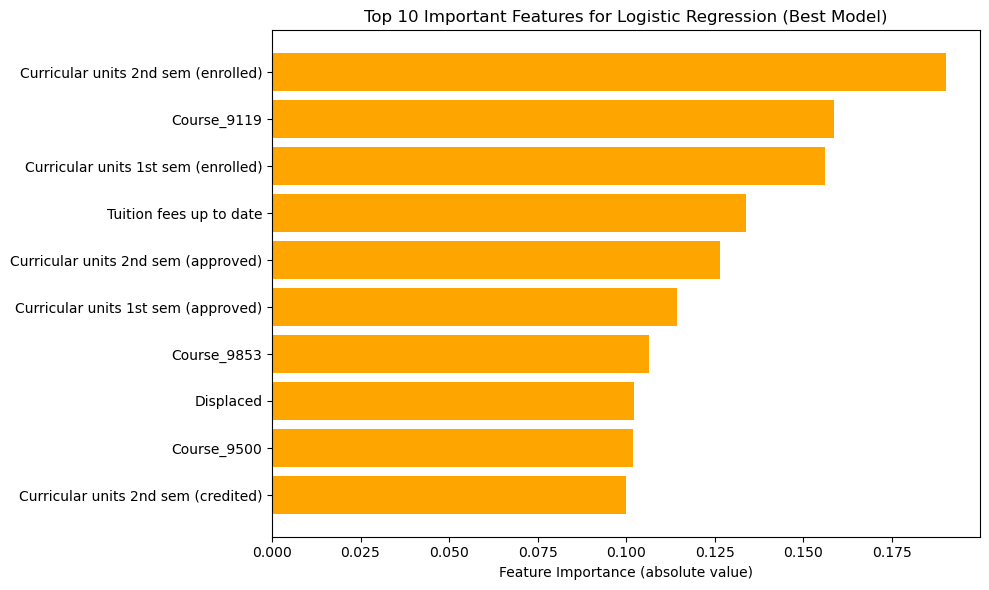

In [28]:
feature_names = xtrain_resampled_df1.columns if isinstance(xtrain_resampled_df1, pd.DataFrame) else [f'feature_{i}' for i in range(xtrain_resampled_df1.shape[1])]


average_coefficients = np.mean([estimator.coef_[0] for estimator in best_model.estimators_], axis=0)


feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': average_coefficients})
feature_importance_df['Importance'] = feature_importance_df['Importance'].abs()

# Sort
top_10_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='orange')
plt.xlabel('Feature Importance (absolute value)')
plt.title('Top 10 Important Features for Logistic Regression (Best Model)')
plt.gca().invert_yaxis() 
plt.tight_layout()

#### Export the prediction

In [29]:
# Predict on test data
y_pred_test = gd_search.best_estimator_.predict(x_test_post_encoded)

# Reverse the encoding to get original class labels
y_pred_test = label_encoder.inverse_transform(y_pred_test)

#put it to df
submission = pd.DataFrame({'ID': xtest.index,'LogReg_Predicted': y_pred_test})
submission.to_csv('./submissions/submission_logreg.csv', index=False)

### ROC & AUC
Here we create ROC and AUC plot to compare baseline model and improved model.

c:\Users\fahja\micromamba\envs\cs109a\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Baseline Model ROC and AUC values:
Class Dropout: AUC = 0.87
Class Enrolled: AUC = 0.74
Class Graduate: AUC = 0.88

Improved Model ROC and AUC values:
Class Dropout: AUC = 0.92
Class Enrolled: AUC = 0.86
Class Graduate: AUC = 0.94


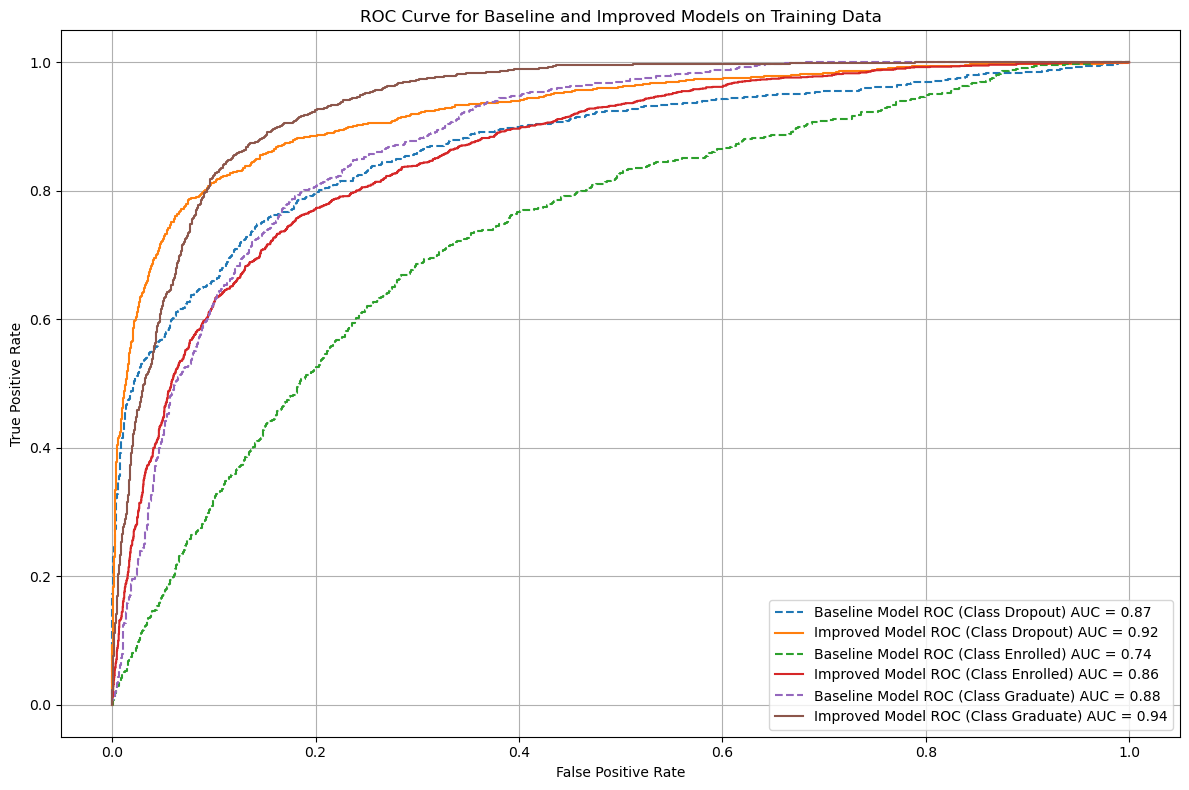

In [30]:
# Refit LabelEncoder with correct classes
correct_classes = ['Dropout', 'Enrolled', 'Graduate']
label_encoder = LabelEncoder()
label_encoder.fit(correct_classes)


# Convert ytrain and y_train_pred_base_model using the label encoder
 # Convert 'Dropout', 'Enrolled', 'Graduate' to 0, 1, 2
ytrain_encoded = label_encoder.transform(ytrain) 
y_train_pred_base_model_encoded = label_encoder.transform(y_train_pred_base_model)


# Baseline Model &Improved Model
y_prob_baseline_train = base_model.predict_proba(xtrain)
y_prob_best_train = best_model.predict_proba(xtrain_resampled_df1)

# Binarise the labels for both models
ytrain_binarized = label_binarize(ytrain_encoded, 
                                  classes=range(len(label_encoder.classes_)))
ytrain_resampled_binarized = label_binarize(ytrain_resampled1,
                                             classes=range(len(label_encoder.classes_)))


# for Baseline Model
fpr_baseline_train = {}
tpr_baseline_train = {}
roc_auc_baseline_train = {}

# for Improved Model
fpr_best_train = {}
tpr_best_train = {}
roc_auc_best_train = {}



# Calculate ROC and AUC for the "baseline model"
print("Baseline Model ROC and AUC values:")
for i in range(len(label_encoder.classes_)):
        fpr_baseline_train[i], tpr_baseline_train[i], _ = roc_curve(ytrain_binarized[:, i], y_prob_baseline_train[:, i])
        roc_auc_baseline_train[i] = auc(fpr_baseline_train[i], tpr_baseline_train[i])
        print(f"Class {label_encoder.inverse_transform([i])[0]}: AUC = {roc_auc_baseline_train[i]:.2f}")


# Calculate ROC and AUC for the "improved model"
print("\nImproved Model ROC and AUC values:")
for i in range(len(label_encoder.classes_)):
        fpr_best_train[i], tpr_best_train[i], _ = roc_curve(ytrain_resampled_binarized[:, i], y_prob_best_train[:, i])
        roc_auc_best_train[i] = auc(fpr_best_train[i], tpr_best_train[i])
        print(f"Class {label_encoder.inverse_transform([i])[0]}: AUC = {roc_auc_best_train[i]:.2f}")


plt.figure(figsize=(12, 8))
for i in range(len(label_encoder.classes_)):
    if i in fpr_baseline_train and i in fpr_best_train:
        plt.plot(fpr_baseline_train[i], tpr_baseline_train[i], linestyle='--', label=f'Baseline Model ROC (Class {label_encoder.inverse_transform([i])[0]}) AUC = {roc_auc_baseline_train[i]:.2f}')
        plt.plot(fpr_best_train[i], tpr_best_train[i], linestyle='-', label=f'Improved Model ROC (Class {label_encoder.inverse_transform([i])[0]}) AUC = {roc_auc_best_train[i]:.2f}')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Baseline and Improved Models on Training Data')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

### Feature Engineering

- **Baseline Model**: All available variables were used to construct the baseline model.

- **Improved Model**: Certain variables, such as "Educational Special Needs," "Previous Qualification," and "International," were excluded due to data imbalance. Additionally, some variables were simplified to reduce the complexity of subcategories. For example, "Marital Status," "Mother's Qualification," "Father's Qualification," and "Age at Enrollment" were consolidated.

### Top 10 Important Features

#### Baseline Model
- The feature "Curricular Units 2nd Sem (Enrolled)" emerged as the most important predictor, followed by "Curricular Units 1st Sem (Enrolled)" and "Curricular Units 2nd Sem (Approved)." The feature "Curricular Units 2nd Sem (Grade)" was ranked fourth, while "Curricular Units 1st Sem (Approved)" was fifth in importance.

- Features such as "Tuition Fees Up to Date," "Debtor," "Application Order," and "Marital Status" had importance scores below 0.03, indicating their limited predictive value.

#### Improved Model
- "Curricular Units 2nd Sem (Enrolled)" remained the most significant feature, underscoring the influence of course enrollment on student outcomes.

- "Tuition Fees Up to Date" was the second most important feature, followed by "Curricular Units 1st Sem (Enrolled)" in third place.

- The courses "Informatics of Engineers" and "Basic Education" also had a strong influence on the model's predictions.

- The "Displaced" variable played a significant role, followed by "GDP_3.51."

Overall, both the baseline and improved models identified common important features, including "Curricular Units 2nd Sem (Enrolled)," "Tuition Fees Up to Date," "Curricular Units 1st Sem (Enrolled)," and "Curricular Units 2nd Sem (Approved)." However, the improved model identified additional top features, such as the courses "Informatics of Engineers," "Basic Education," and "GDP_3.51," that were not highlighted in the baseline model.

### Model Performance

#### Baseline Model
For the baseline model, all variables were included in a "OneVsRestClassifier" framework.

- The model achieved a precision of **0.78** for predicting "Dropout," **0.77** for predicting "Graduate," and **0.55** for predicting "Enrolled." The overall accuracy was **0.76**, indicating relatively good performance.

#### Improved Model
The improved model was optimized using **grid search** and **5-fold cross-validation**. The best hyperparameters were: `{'estimator__C': 10, 'estimator__class_weight': None, 'estimator__penalty': 'l1', 'estimator__solver': 'saga'}`.

- The model achieved a precision of **0.83** for predicting "Dropout," **0.72** for predicting "Graduate," and **0.76** for predicting "Enrolled." These values are higher than those of the baseline model, demonstrating the effectiveness of the improvements.

### ROC and AUC Comparison

#### Class Dropout
Both the baseline and improved models performed similarly well for the "Dropout" class:
- **Baseline Model AUC**: 0.92
- **Improved Model AUC**: 0.92

#### Class Enrolled
The improved model showed a significant improvement in distinguishing the "Enrolled" class compared to the baseline model. This is evident in the ROC plot, where the solid red line for the improved model is consistently above the green dashed line for the baseline model:
- **Baseline Model AUC**: 0.77
- **Improved Model AUC**: 0.86

#### Class Graduate
The improved model also demonstrated improved performance in predicting the "Graduate" class, although the difference was less pronounced compared to the "Enrolled" class. Both models had relatively high AUC values:
- **Baseline Model AUC**: 0.91
- **Improved Model AUC**: 0.94

### Overall Comparison
The improved model generally outperformed the baseline model across all classes, particularly for the "Enrolled" and "Graduate" classes. The AUC values for the "Dropout" class were similar for both models, indicating no significant improvement in that area. The visual differences between the ROC curves for the "Enrolled" and "Graduate" classes clearly demonstrate the improved model's ability to better differentiate between positive and negative outcomes.

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

#### Export the prediction

In [31]:
# Predict on test data
y_pred_test = gd_search.best_estimator_.predict(x_test_post_encoded)
y_pred_test = label_encoder.inverse_transform(y_pred_test)


submission = pd.DataFrame({'ID': xtest.index,'LogReg_Predicted': y_pred_test})
submission.to_csv('./submissions/submission_logreg.csv', index=False)

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

In [32]:
grader.check("logreg")

logreg results: All test cases passed!

## Model 2: Decision Tree Classifier

Develop a Decision Tree Classifier to predict student outcomes. You are expected to perform model selection, tuning, evaluation, and interpretation.

**Instructions**:
1. **Model Selection & Training**
   - Train a **Decision Tree Classifier** with hyperparameter tuning.
   - Justify your modeling decisions, including feature preprocessing, hyperparameter values (e.g., depth, splits), and pruning if applied.

2. **Prediction Generation**
   - Generate predictions for the test dataset.
   - Save your predictions in the following file path: `./submissions/submission_dt.csv`.
   - Follow the structure of the expected submission file provided in `./data/example_submissions/example_submission_dt.csv`.

3. **Feature Importance & Interpretation**
   - Analyze and interpret the feature importance of the decision tree model (e.g., Gini importance).
   - Visualize and explain which features had the most impact.

**Kaggle Competition Link**: [Decision Tree Kaggle Competition](https://www.kaggle.com/t/c2df59ec7be441fa84a882e2f2b8a03e)  
**Kaggle Rules Summary**:
- You **must use a Decision Tree Classifier**.
- No additional data beyond what was distributed with the assignment may be used (data derived from the provided dataset is allowed).
- Submissions will be **disqualified** if their performance cannot be reproduced by the relevant model in your notebook.

---

#### Model Selection & Training

The idea of exploring the Decision Tree Classifier begins with creating a baseline model using the balanced xtrain/ytrain data without feature engineering or one-hot encoding. This approach works because decision trees are non-parametric models that can handle raw data directly. They can split data based on thresholds, making them robust to different data distributions, and they naturally handle categorical variables without requiring one-hot encoding. This characteristic allows decision trees to work effectively with less-prepared data compared to models like logistic regression.

For our baseline model, we explore the criterion parameter using both 'gini' and 'entropy' to compare their performance and determine which method yields the best results. We use this as a benchmark for evaluation. The model is tested with a range of tree depths, starting from a minimum depth of 2 up to a maximum depth of 30, using cross-validation to assess performance.

In [33]:

#Start with the decision tree baseline with cv =5. 
criterion = ['gini', 'entropy']

first_depth = 2
final_depth = 30
step = 2


results = []
for cur_criterion in criterion:      
    for max_depth in range(first_depth, final_depth+1, step):
        dt = DecisionTreeClassifier(criterion=cur_criterion , max_depth=max_depth,random_state=109)
        scores = cross_val_score(estimator=dt, X=xtrain_resampled_df, y=ytrain_resampled_df, cv=5, n_jobs=-1)
        
        cur_results = {'criterion': cur_criterion,
                      'depth': max_depth,
                      'all_cv': scores,
                      'mean_cv': scores.mean()}
        results.append(cur_results)
dt = pd.DataFrame(results)

In [34]:
dt.head()

,criterion,depth,all_cv,mean_cv
0,gini,2,"[0.6301507537688442, 0.6297786720321932, 0.656...",0.659431
1,gini,4,"[0.6532663316582915, 0.6539235412474849, 0.681...",0.693832
2,gini,6,"[0.6864321608040201, 0.710261569416499, 0.7112...",0.733866
3,gini,8,"[0.7025125628140704, 0.721327967806841, 0.7253...",0.747142
4,gini,10,"[0.6904522613065327, 0.7243460764587525, 0.750...",0.753785


#### Visualize the accuracy for different hyperparameters

The plot shows the variation in cross-validation accuracy as the depth of a decision tree increases, comparing the performance of the 'gini' and 'entropy' criteria. Initially, accuracy improves for both criteria as depth increases, with 'Gini' peaking around a depth of 10 and 'Entropy' peaking around 16, after which the performance stabilizes or slightly declines, likely due to overfitting. Overall, both criteria perform similarly, but 'Entropy' shows a slight advantage in accuracy at greater depths

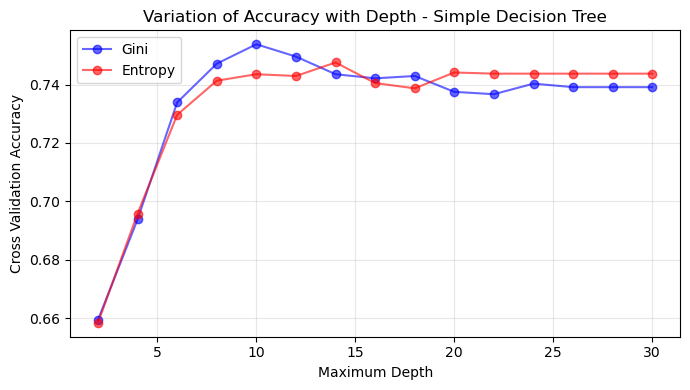

In [35]:
plt.figure(figsize=(7, 4))

plt.plot(dt[dt.criterion == 'gini'].depth,
         dt[dt.criterion == 'gini'].mean_cv, 'b-', marker='o', alpha = 0.6, label='Gini')
plt.plot(dt[dt.criterion == 'entropy'].depth,
         dt[dt.criterion == 'entropy'].mean_cv, 'r-', marker='o', alpha = 0.6, label='Entropy')
plt.ylabel("Cross Validation Accuracy")
plt.xlabel("Maximum Depth")
plt.title('Variation of Accuracy with Depth - Simple Decision Tree')
plt.legend()
plt.grid(alpha = 0.3)

plt.tight_layout()

In [36]:
#Use code from lab
df_gini = dt[dt['criterion'] == 'gini']
df_entropy = dt[dt['criterion'] == 'entropy']

x_gini = df_gini['depth'].values.astype(float)
y_gini = df_gini['mean_cv'].values.astype(float)

x_entropy = df_entropy['depth'].values.astype(float)
y_entropy = df_entropy['mean_cv'].values.astype(float)

stds_gini = np.array([ np.std(scores) for scores in df_gini['all_cv']], dtype = float) 
stds_entropy = np.array([ np.std(scores) for scores in df_entropy['all_cv']], dtype = float)

In [37]:
#Finding the best hyper parameter

mean_CV_acc_gini = df_gini['mean_cv']
mean_CV_acc_entropy = df_entropy['mean_cv']

best_idx_gini = np.argmax(mean_CV_acc_gini)
best_idx_entropy = np.argmax(mean_CV_acc_entropy)

best_depth_gini = df_gini['depth'].iloc[best_idx_gini]
best_depth_entropy = df_entropy['depth'].iloc[best_idx_entropy]

print('The best depth based on Gini impurity was found to be: ', best_depth_gini)
print('The best depth based on Entropy was found to be: ', best_depth_entropy)


The best depth based on Gini impurity was found to be:  10
The best depth based on Entropy was found to be:  14


In [38]:
#Using code from lab
#Evalaute the performance at the best depth
model_tree_gini = DecisionTreeClassifier(max_depth=best_depth_gini, criterion = 'gini',random_state=109)
model_tree_entropy = DecisionTreeClassifier(max_depth=best_depth_entropy, criterion ='entropy',random_state=109)

model_tree_gini.fit(xtrain_resampled_df, ytrain_resampled_df)
model_tree_entropy.fit(xtrain_resampled_df, ytrain_resampled_df)

#Check Accuracy in Train and Test Set 
acc_trees_train_gini = accuracy_score(ytrain_resampled_df, model_tree_gini.predict(xtrain_resampled_df))
acc_trees_train_entropy = accuracy_score(ytrain_resampled_df, model_tree_entropy.predict(xtrain_resampled_df))


print("================ Accuracy ================")
print("Model tree Gini: Accuracy, Training Set \t : {:.2%}".format(acc_trees_train_gini))
print("Model Tree Entropy: Accuracy, Training Set \t : {:.2%}".format(acc_trees_train_entropy))



================ Accuracy ================
Model tree Gini: Accuracy, Training Set 	 : 90.59%
Model Tree Entropy: Accuracy, Training Set 	 : 96.64%


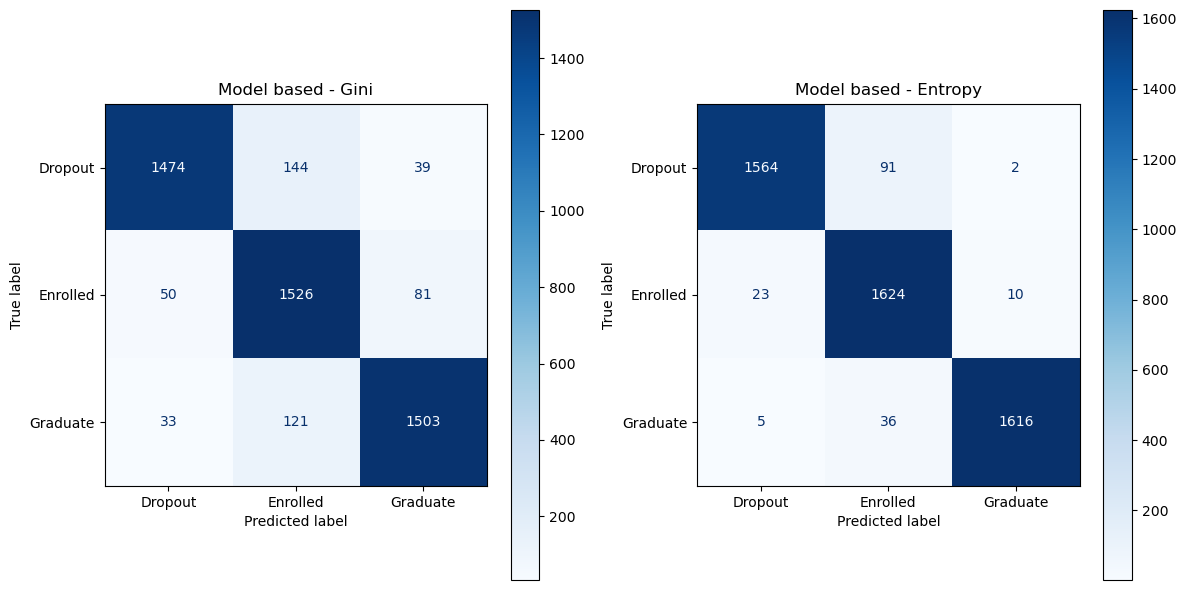

In [39]:
#plot confustion Matrix

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
ConfusionMatrixDisplay.from_estimator(model_tree_gini, xtrain_resampled_df, ytrain_resampled_df, cmap=plt.cm.Blues, ax = axes[0]);
ConfusionMatrixDisplay.from_estimator(model_tree_entropy, xtrain_resampled_df, ytrain_resampled_df, cmap=plt.cm.Blues, ax = axes[1])
axes[0].set_title('Model based - Gini')
axes[1].set_title('Model based - Entropy')

plt.tight_layout()


From the Model Accuracy, Model based on Entropy shows highly overfit with 100% accuracy.  Model improvement aims to reduce the overfitting on entropy based model by optimize the ccp_alpha

#### Model Improvement

Based on the results, the entropy-based decision tree with a high depth is overfitting the data, which is evident from the perfect performance on the training data (100% accuracy) but a likely inability to generalize well to unseen data. The Gini-based decision tree shows less overfit.

In order to improve the model based on Entropy, we will use the pruning method on entropy and see the result to compare with the result from best max depth based on Gini parmater. The reason we choose pruning based on the max_depth result from entropy which is much higher than Gini. ccp_alpha tuning is used.  We performed multiple rounds of adjusting ccp_alpha. The best outcome is at ccp_alpha = 0.0025  as shown below.   

Best Alpha: 0.0029474822920364935
Train Score: 0.7843492255079461


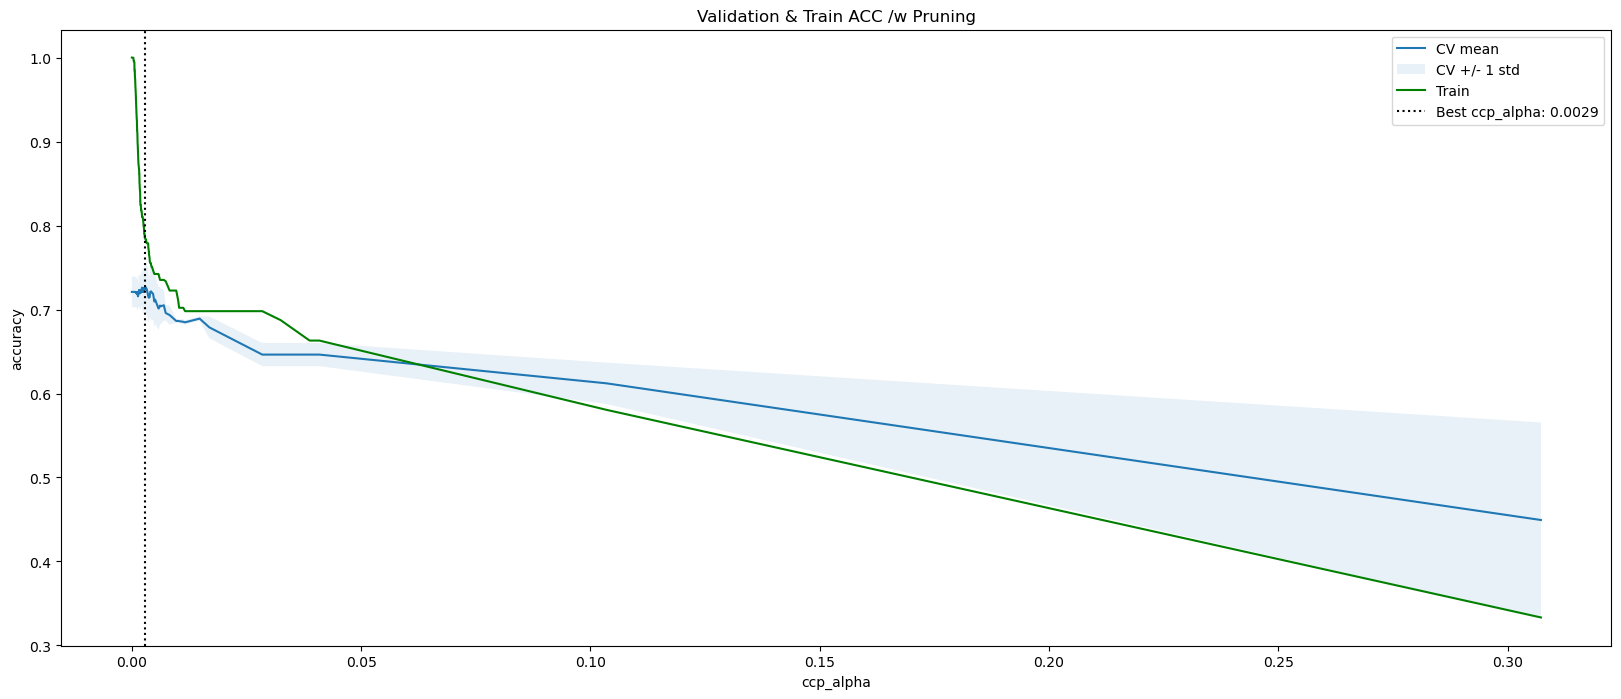

In [40]:
params = {'criterion': 'entropy', 'class_weight': 'balanced', 'random_state':109}
path = DecisionTreeClassifier(**params).cost_complexity_pruning_path(xtrain_resampled_df, ytrain_resampled_df)
ccp_alphas = path.ccp_alphas

cv_accs = []
clfs = []
cv_accs = []

for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=alpha, **params).fit(xtrain_resampled_df, ytrain_resampled_df)
    clfs.append(clf)
    cv_accs.append(cross_val_score(clf, xtrain_resampled_df, ytrain_resampled_df, cv=2, n_jobs=-1))

cv_accs = np.array(cv_accs)
best_alpha = ccp_alphas[np.argmax(cv_accs.mean(axis=1))]
print("Best Alpha:", best_alpha)

train_scores = [clf.score(xtrain_resampled_df, ytrain_resampled_df) for clf in clfs]

plt.figure(figsize=(20,8))
plt.plot(ccp_alphas, cv_accs.mean(axis=1), label='CV mean')
plt.fill_between(ccp_alphas,
                 cv_accs.mean(axis=1)-cv_accs.std(axis=1),
                 cv_accs.mean(axis=1)+cv_accs.std(axis=1),
                 alpha=.1, 
                label='CV +/- 1 std')

plt.plot(ccp_alphas, train_scores, c='g', label='Train')
plt.axvline(best_alpha, c='k', ls=':', label=f'Best ccp_alpha: {best_alpha:.4f}')
plt.xlabel('ccp_alpha')
plt.ylabel('accuracy')
plt.legend()
plt.title("Validation & Train ACC /w Pruning");

print("Train Score:", train_scores[np.argmax(cv_accs.mean(axis=1))])


Text(0.5, 1.0, 'Best Pruned Decision Tree (Entropy)')

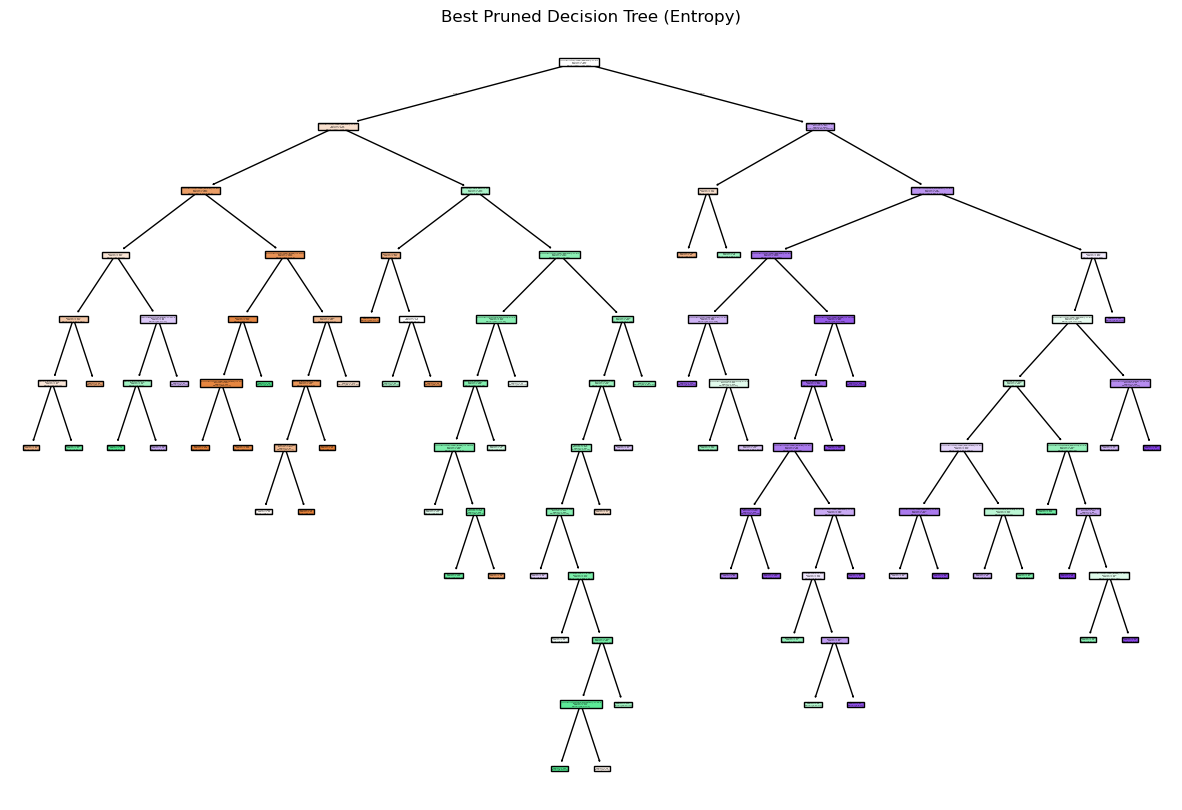

In [41]:
entropy_pruned = DecisionTreeClassifier(max_depth=best_depth_entropy, criterion='entropy', 
                                        ccp_alpha=best_alpha,random_state=109)

entropy_pruned.fit(xtrain_resampled_df, ytrain_resampled_df.values.ravel())

plt.figure(figsize=(15, 10))
plot_tree(entropy_pruned, filled=True, feature_names=xtrain_resampled_df.columns, class_names=None)
plt.title('Best Pruned Decision Tree (Entropy)')


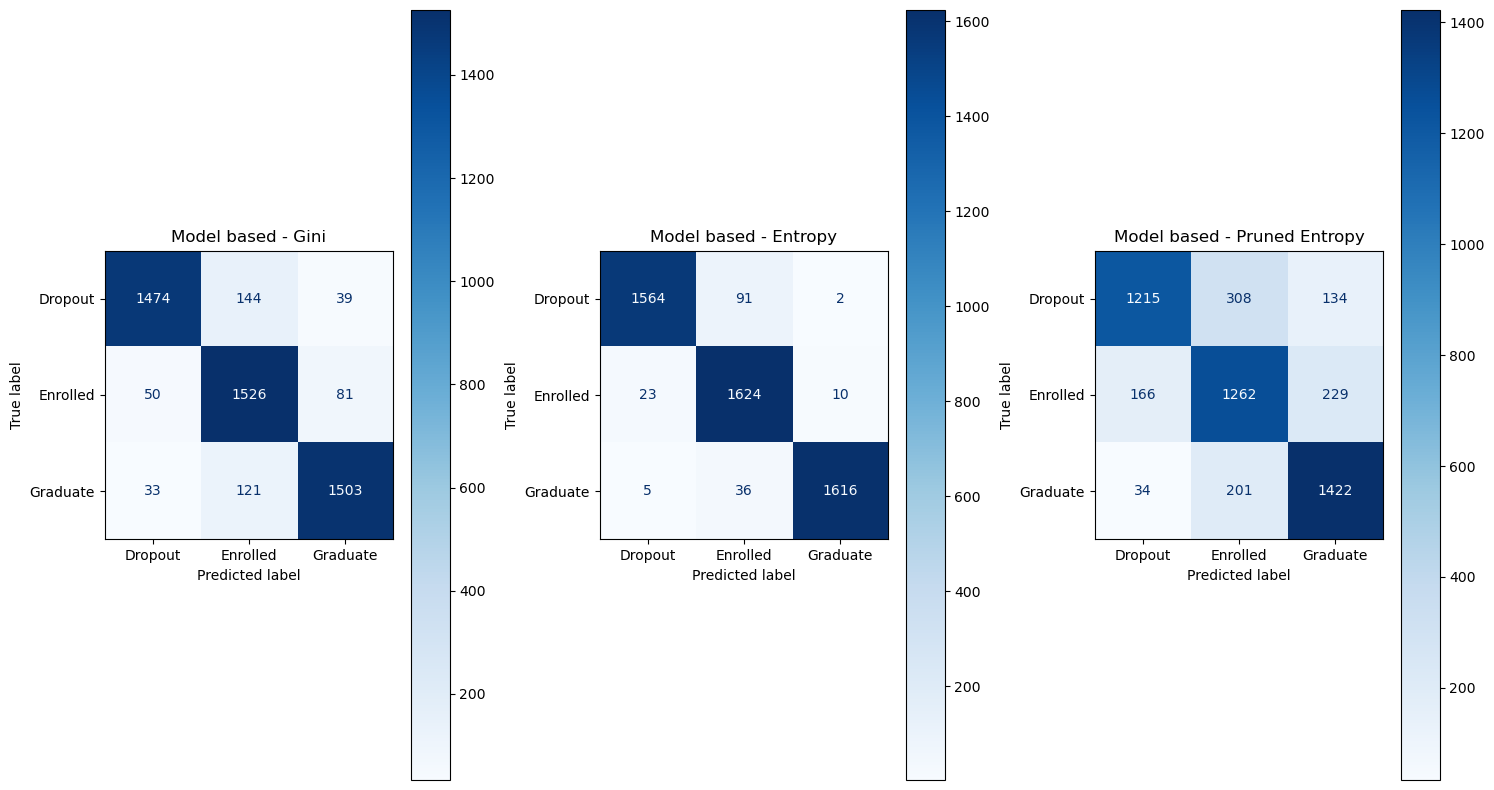

In [42]:
#compare confusion matrix

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,8))
ConfusionMatrixDisplay.from_estimator(model_tree_gini, xtrain_resampled_df, ytrain_resampled_df, cmap=plt.cm.Blues, ax = axes[0]);
ConfusionMatrixDisplay.from_estimator(model_tree_entropy, xtrain_resampled_df, ytrain_resampled_df, cmap=plt.cm.Blues, ax = axes[1])
ConfusionMatrixDisplay.from_estimator(entropy_pruned, xtrain_resampled_df, ytrain_resampled_df, cmap=plt.cm.Blues, ax = axes[2])
axes[0].set_title('Model based - Gini')
axes[1].set_title('Model based - Entropy')
axes[2].set_title('Model based - Pruned Entropy')

plt.tight_layout()


In [43]:

#Calculate Accuracy score

acc_trees_train_gini = accuracy_score(ytrain_resampled_df, model_tree_gini.predict(xtrain_resampled_df))
acc_trees_train_entropy = accuracy_score(ytrain_resampled_df, model_tree_entropy.predict(xtrain_resampled_df))
acc_trees_train_pruned_entropy = accuracy_score(ytrain_resampled_df, entropy_pruned.predict(xtrain_resampled_df))


print("================ Accuracy ================")
print("Model based Gini: Accuracy, Training Set \t : {:.2%}".format(acc_trees_train_gini))
print("Model based Entropy: Accuracy, Training Set \t : {:.2%}".format(acc_trees_train_entropy))
print("Model based pruned Entropy: Accuracy, Training Set \t : {:.2%}".format(acc_trees_train_pruned_entropy))

================ Accuracy ================
Model based Gini: Accuracy, Training Set 	 : 90.59%
Model based Entropy: Accuracy, Training Set 	 : 96.64%
Model based pruned Entropy: Accuracy, Training Set 	 : 78.43%


#### Classification Report

In [44]:


y_pred_gini_train = model_tree_gini.predict(xtrain_resampled_df)
y_pred_entropy_train = model_tree_entropy.predict(xtrain_resampled_df)
y_pred_p_ent_train = entropy_pruned.predict(xtrain_resampled_df)

# Generate classification reports
print("=========== Classification Report ===========")
print("Model Tree - Gini (Training Set):")
print(classification_report(ytrain_resampled_df, y_pred_gini_train, 
                            target_names=label_encoder.classes_))

print("\nModel Tree - Entropy (Training Set):")
print(classification_report(ytrain_resampled_df, y_pred_entropy_train, target_names=label_encoder.classes_))


print("\nModel Tree - Pruned Entropy (Training Set):")
print(classification_report(ytrain_resampled_df, y_pred_p_ent_train, target_names=label_encoder.classes_))



=========== Classification Report ===========
Model Tree - Gini (Training Set):
              precision    recall  f1-score   support

     Dropout       0.95      0.89      0.92      1657
    Enrolled       0.85      0.92      0.89      1657
    Graduate       0.93      0.91      0.92      1657

    accuracy                           0.91      4971
   macro avg       0.91      0.91      0.91      4971
weighted avg       0.91      0.91      0.91      4971


Model Tree - Entropy (Training Set):
              precision    recall  f1-score   support

     Dropout       0.98      0.94      0.96      1657
    Enrolled       0.93      0.98      0.95      1657
    Graduate       0.99      0.98      0.98      1657

    accuracy                           0.97      4971
   macro avg       0.97      0.97      0.97      4971
weighted avg       0.97      0.97      0.97      4971


Model Tree - Pruned Entropy (Training Set):
              precision    recall  f1-score   support

     Dropout       0

**The Gini model** achieves a balanced performance with an accuracy of ~90%, showing strong recall and precision for all classes. 

**The Entropy model** performs perfectly on the training set with ~96% accuracy, precision, and recall, but this is a clear indication of overfitting. 

**The Pruned Entropy model**, optimized with the ccp_alpha parameter, reduces overfitting by simplifying the tree while maintaining key features, resulting in an accuracy of ~78%. Although its accuracy is slightly lower, it generalizes better than the Entropy model, making it the most reliable and robust model among the three.

***Feature importance***

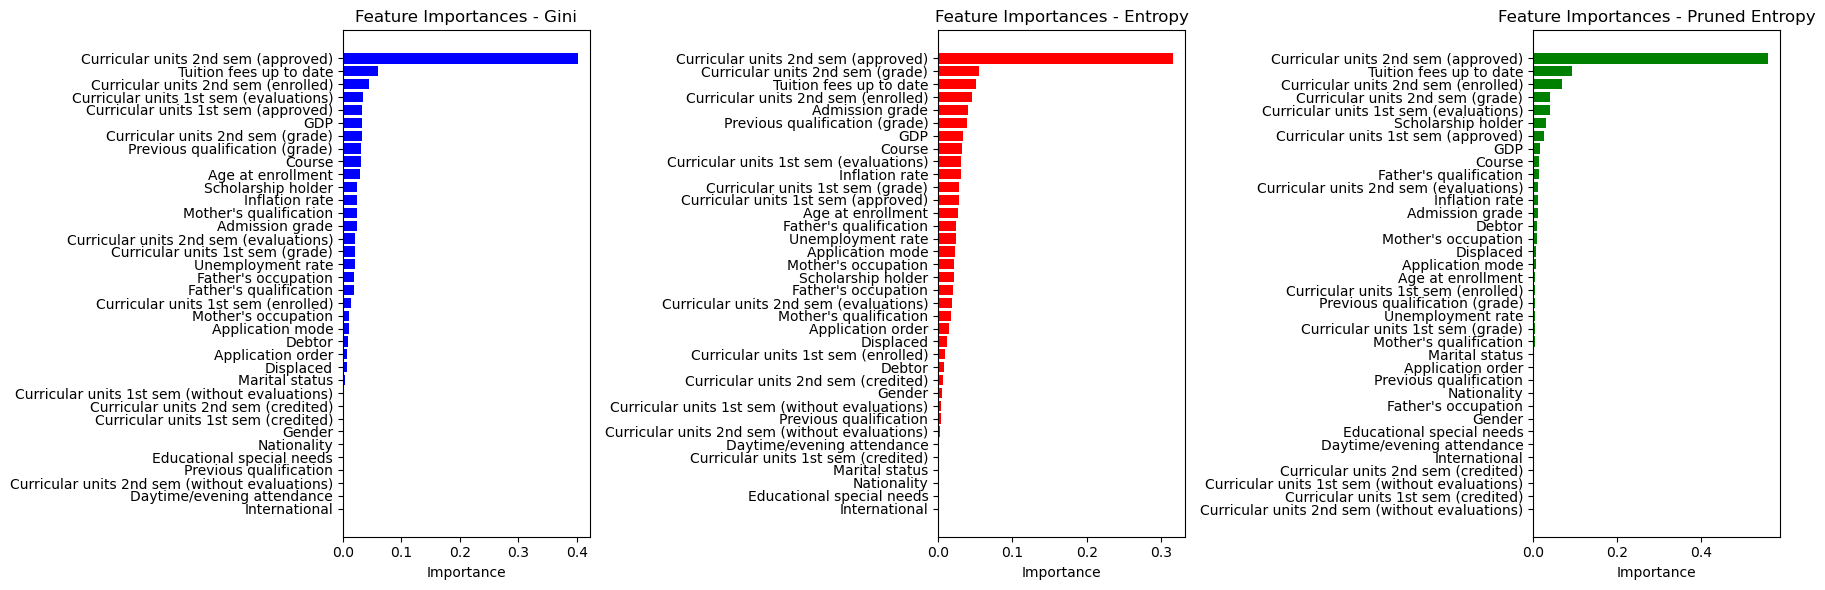

In [45]:
# Feature importances for Gini, Entropy,  and Pruned Entropy
importances_gini = model_tree_gini.feature_importances_
importances_entropy = model_tree_entropy.feature_importances_
importances_pruned_entropy = entropy_pruned.feature_importances_

# Create df for feature importances and sort them
feature_imp_gini = pd.DataFrame({
    'feature': xtrain_resampled_df.columns,
    'importance': importances_gini
}).sort_values('importance', ascending=False)

feature_imp_entropy = pd.DataFrame({
    'feature': xtrain_resampled_df.columns,
    'importance': importances_entropy
}).sort_values('importance', ascending=False)

feature_imp_p_ent = pd.DataFrame({
    'feature': xtrain_resampled_df.columns,
    'importance': importances_pruned_entropy
}).sort_values('importance', ascending=False)


fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)


sorted_gini = feature_imp_gini.head(36)
axes[0].barh(sorted_gini['feature'], sorted_gini['importance'], color='b')
axes[0].set_title('Feature Importances - Gini')
axes[0].set_xlabel('Importance')
axes[0].invert_yaxis()


sorted_entropy = feature_imp_entropy.head(36)  
axes[1].barh(sorted_entropy['feature'], sorted_entropy['importance'], color='r')
axes[1].set_title('Feature Importances - Entropy')
axes[1].set_xlabel('Importance')
axes[1].invert_yaxis()

sorted_p_ent = feature_imp_p_ent.head(36)
axes[2].barh(sorted_p_ent['feature'], sorted_p_ent['importance'], color='g')
axes[2].set_title('Feature Importances - Pruned Entropy')
axes[2].set_xlabel('Importance')
axes[2].invert_yaxis()

plt.tight_layout()



From the feature importance plots, **"Curricular units 2nd sem (approved)"** stands out as the most important feature across all three decision tree models. Other key features include **"Curricular units 2nd sem (grade)"** and **"Tuition fees up to date,"** which also show strong contributions to the predictions. The **Gini model** and **Entropy model** consider a wider range of features, like **"Course," "Previous qualification (grade),"** and **"Unemployment rate,"** while the **Pruned Entropy model** simplifies the tree by focusing only on the most critical features. The pruned model is easier to interpret but may lose some detail by excluding features with smaller impacts. Overall, it seems that academic performance and financial factors are the most important predictors in this dataset.

***Prediction Generation***

In [46]:
DT_Predicted = model_tree_gini.predict(xtest)

predicted_df = pd.DataFrame({
    'ID': xtest.index,  
    'DT_Predicted': DT_Predicted
})

predicted_df.to_csv('./submissions/submission_dt_gini.csv', index=False)

In [47]:
#Generate the predictions from test data
DT_Predicted = model_tree_gini.predict(xtest)

predicted_df = pd.DataFrame({
    'ID': xtest.index,  
    'DT_Predicted': DT_Predicted
})


predicted_df.to_csv('./submissions/submission_dt_ent.csv', index=False)

In [48]:
DT_Predicted = entropy_pruned.predict(xtest)

predicted_df = pd.DataFrame({
    'ID': xtest.index,  
    'DT_Predicted': DT_Predicted
})

predicted_df.to_csv('./submissions/submission_dt_p_ent.csv', index=False)

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

The Answer has been provided along each steps with code

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

In [49]:
grader.check("dt")

dt results: All test cases passed!

## Model 3: Custom Model

Develop a custom model of your choice using any methods covered in class up through Lecture 20 (so not boosting, neural networks, etc.). You are expected to perform model selection, tuning, evaluation, and interpretation.

**Instructions**:
1. **Model Selection & Training**
   - Train a custom model of your choice, using any techniques and methods up to and including Lecture 20.
   - Provide a detailed explanation of your modeling choices, including preprocessing, hyperparameter tuning, and rationale for model selection.

2. **Prediction Generation**
   - Generate predictions for the test dataset.
   - Save your predictions in the following file path: `./submissions/submission_custom.csv`.
   - Follow the structure of the expected submission file provided in `./data/example_submissions/example_submission_custom.csv`.

3. **Feature Importance & Interpretation**
   - Analyze and interpret feature importance where possible for your selected model.
   - Provide visualizations and explanations to support your interpretations.

**Kaggle Competition Link**: [Custom Model Kaggle Competition](https://www.kaggle.com/t/bb69567807ff4c32ba8599c06e773b8c)  
**Kaggle Rules Summary**:
- The model must use only methods covered in class up to and including Lecture 20 (**no boosting, no neural networks, etc.**).
- Submissions will be **disqualified** if lacking sufficient description of the approach taken or if performance cannot be reproduced in your notebook.
- No additional data beyond what was distributed with the assignment may be used (data derived from the provided dataset is allowed).

---

We selected **Random Forest** as our custom model because it builds upon the strengths of Decision Trees. Random Forest increases accuracy, reduces overfitting, and is more robust to noisy data and feature 
selection issues. Compared to OVR Logistic Regression, Random Forest handles non-linear relationships, multiclass classification, and multicollinearity more effectively while requiring less preprocessing,
such as scaling.

We used the same input data as the Decision Tree model and employed GridSearchCV to identify the best hyperparameters. The goal is to compare the performance of the Random Forest model with the Pruned Entropy-based Decision Tree model.

Since Random Forest requires the response variable to be in numerical format to calculate splits, impurity measures, and make predictions, we applied label encoding to transform categorical target variables into numerical values, enabling the model to predict categories effectively.

We developed two baseline Random Forest models: `rf_gini` (using the Gini criterion) and `rf_entropy` (using the Entropy criterion). Additionally, we created an improved model, `rf_tuned1`, using the optimal parameters identified through GridSearchCV.

In [50]:
xtrain_resampled_df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,1,6,9773,1,1,125.0,1,1,1,5,4,122.2,0,0,0,1,1,0,19,0,0,6,7,5,13.60,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06
1,1,17,2,9147,1,1,122.0,1,19,19,7,7,116.1,1,0,0,1,0,1,19,0,0,5,8,5,11.20,0,0,5,5,3,11.000000,0,12.4,0.5,1.79
2,1,17,3,9670,1,1,123.0,1,38,38,7,8,118.8,1,1,0,1,0,1,18,0,0,6,10,5,12.00,0,0,6,11,5,12.333333,0,11.1,0.6,2.02
3,1,39,1,9500,1,19,133.1,1,38,38,9,9,114.8,0,0,0,1,0,0,28,0,0,7,15,1,10.75,0,0,7,10,1,10.000000,0,13.9,-0.3,0.79
4,2,7,1,9254,1,2,100.0,1,37,37,9,9,100.0,0,0,0,0,0,0,37,0,0,5,5,0,0.00,0,0,5,10,0,0.000000,0,10.8,1.4,1.74


In [51]:

# Prepare for Random Forest regression.
# Perform one-hot encoding on y_train_resampled because Random Forest does not support categorical data directly; it requires numeric input.


onehot_encoder = OneHotEncoder(sparse_output=False)
ytrain_OHencoded = onehot_encoder.fit_transform(ytrain_resampled_df)

print("One-Hot Encoded y_train resampled:")
print(ytrain_OHencoded)


# Retrieve the original labels for later use in the predicted data
original_labels = onehot_encoder.categories_[0]  
print("Original Labels:", original_labels)


One-Hot Encoded y_train resampled:
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
Original Labels: ['Dropout' 'Enrolled' 'Graduate']


In [52]:
#Apply Label encoder instead of onehotencoder
ytrain_resampled_df
lab_enc = LabelEncoder()

y_train_encoded = lab_enc.fit_transform(ytrain_resampled_df)
y_train_encoded


c:\Users\fahja\micromamba\envs\cs109a\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2, 2, 2, ..., 1, 1, 1])

In [53]:
# we checked Label encoding mapping
label_mapping = dict(zip(lab_enc.classes_, range(len(lab_enc.classes_))))
print("Label Mapping:")
for label, encoded_value in label_mapping.items():
    print(f"{label} -> {encoded_value}")

Label Mapping:
Dropout -> 0
Enrolled -> 1
Graduate -> 2


In [54]:
#Create baseline randomforest model using max_depth =30 ,similar to decision tree baseline model.
#choose this number as a starting point for RF. Enable OOB for comparison
#use default "gini" criterion

rf_gini = RandomForestClassifier(max_depth=30,
                           n_estimators=100,
                           max_features='sqrt',
                           oob_score=True,
                           random_state=109)

#perform 5-fold CV
cv_scores = cross_val_score(rf_gini, xtrain_resampled_df, y_train_encoded, cv=5, scoring='accuracy')

rf_gini.fit(xtrain_resampled_df, y_train_encoded)

print(f'The train score is: {rf_gini.score(xtrain_resampled_df, y_train_encoded):.4f}')
print(f'The OOB score is: {rf_gini.oob_score_:.4f}')



The train score is: 1.0000
The OOB score is: 0.8403


In [55]:
#Create baseline randomforest model using max_depth =30 ,similar to decision tree baseline model.
#choose this number as a starting point for RF. Enable OOB for comparison
#use "entropy" criterion

rf_entropy = RandomForestClassifier(criterion='entropy',
                            max_depth=30,
                           n_estimators=100,
                           max_features='sqrt',
                           oob_score=True,
                           random_state=109)

#perform 5-fold CV
cv_scores = cross_val_score(rf_entropy, xtrain_resampled_df, y_train_encoded, cv=5, scoring='accuracy')

rf_entropy.fit(xtrain_resampled_df, y_train_encoded)

print(f'The train score is: {rf_entropy.score(xtrain_resampled_df, y_train_encoded):.4f}')

print(f'The OOB score is: {rf_entropy.oob_score_:.4f}')

The train score is: 1.0000
The OOB score is: 0.8451


The train score is overfitted as it is much more higher than OOB score. It could be from number of Maxdepth. 
We will use gridsearch for optimize the model

In [56]:
#create optimized model with grid search. 

rf2 = GridSearchCV(estimator=RandomForestClassifier(random_state=109),
                  param_grid={'max_depth': [6,8,10,12,14,16,18,20],
                    'min_impurity_decrease': [0.001, 0.01, 0.1],
                    'max_features': ['sqrt', 'log2'],
                    'n_estimators': [100,150,200],
                    'criterion':['gini','entropy']},
                  cv=5,scoring = 'accuracy',n_jobs=-1)

rf2.fit(xtrain_resampled_df, y_train_encoded)



c:\Users\fahja\micromamba\envs\cs109a\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=109),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 8, 10, 12, 14, 16, 18, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_impurity_decrease': [0.001, 0.01, 0.1],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy')

In [57]:
# Get the best parameters
print("Best Parameters:", rf2.best_params_)
print("Best Score:", rf2.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 18, 'max_features': 'sqrt', 'min_impurity_decrease': 0.001, 'n_estimators': 200}
Best Score: 0.8274119086377562


In [58]:
#Use the best parameters from previous step to train final model. name it custom for grader evaluation

rf_tuned1 = RandomForestClassifier(
    max_depth=18,
    min_impurity_decrease = 0.01,
    n_estimators=150,
    criterion = 'entropy',
    random_state=109,
    oob_score=True
)


cv_scores = cross_val_score(rf_tuned1, xtrain_resampled_df,
                             y_train_encoded, cv=5, scoring='accuracy')

rf_tuned1.fit(xtrain_resampled_df, y_train_encoded)

print(f'The train score is: {rf_tuned1.score(xtrain_resampled_df, y_train_encoded):.4f}')
print(f"OOB Score for Final Model: {rf_tuned1.oob_score_:.4f}")


The train score is: 0.7286
OOB Score for Final Model: 0.7206


**Extract Feature Importances from the rf_tuned1 model**

In [59]:
feature_importance = pd.DataFrame({
    'Feature': xtrain_resampled_df.columns,  
    'Importance': rf_tuned1.feature_importances_  
}).sort_values(by='Importance', ascending=False)

# Print All features importance sort high to low
print(feature_importance.head(40))

                                           Feature  Importance
30             Curricular units 2nd sem (approved)    0.326256
31                Curricular units 2nd sem (grade)    0.167497
24             Curricular units 1st sem (approved)    0.137505
16                         Tuition fees up to date    0.094630
25                Curricular units 1st sem (grade)    0.061287
18                              Scholarship holder    0.047504
29          Curricular units 2nd sem (evaluations)    0.038046
19                               Age at enrollment    0.029737
28             Curricular units 2nd sem (enrolled)    0.023384
23          Curricular units 1st sem (evaluations)    0.020055
22             Curricular units 1st sem (enrolled)    0.018061
3                                           Course    0.009466
15                                          Debtor    0.007354
1                                 Application mode    0.005691
17                                          Gender    0

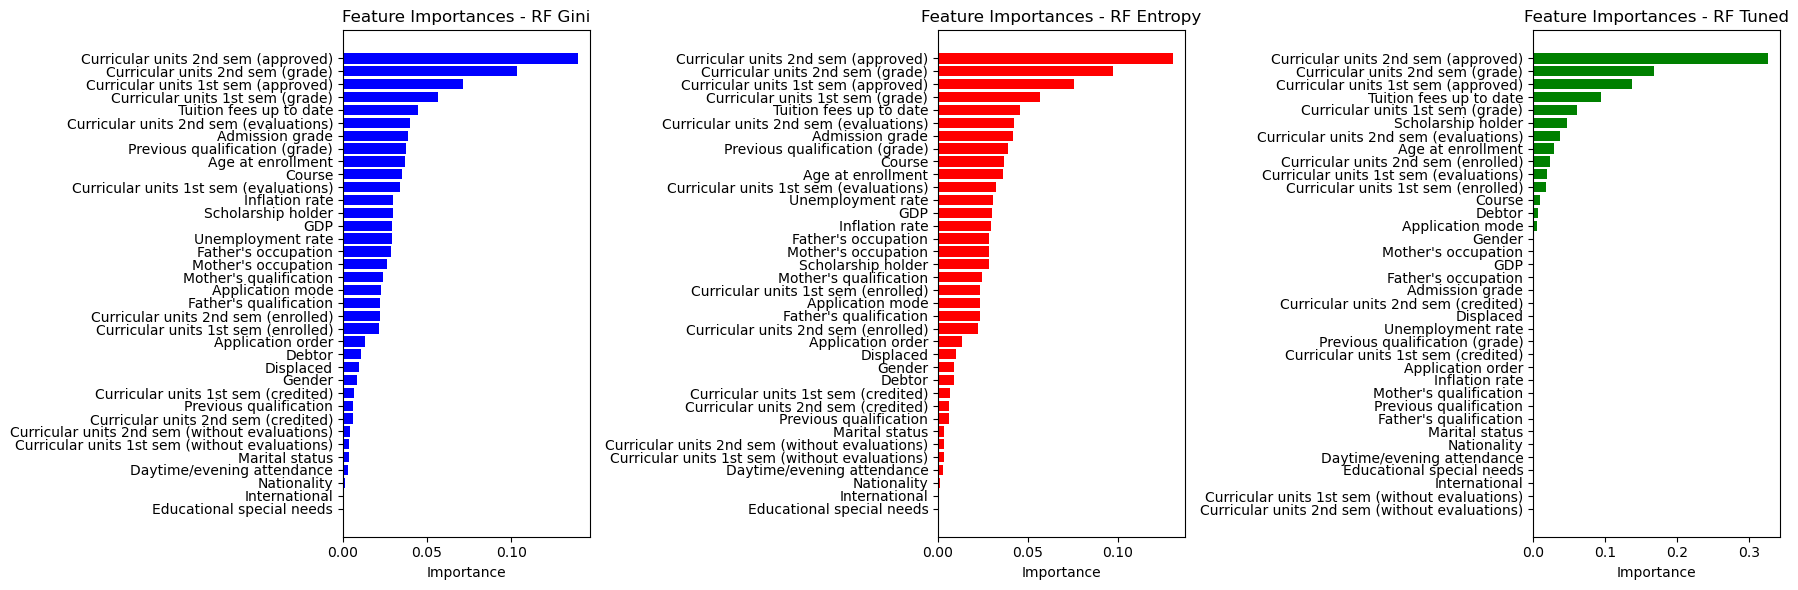

In [60]:
#Feature importance comparison

importances_gini = rf_gini.feature_importances_
importances_entropy = rf_entropy.feature_importances_
importances_tuned = rf_tuned1.feature_importances_

feature_imp_gini = pd.DataFrame({
    'feature': xtrain_resampled_df.columns,
    'importance': importances_gini
}).sort_values('importance', ascending=False)

feature_imp_entropy = pd.DataFrame({
    'feature': xtrain_resampled_df.columns,
    'importance': importances_entropy
}).sort_values('importance', ascending=False)

feature_imp_tuned = pd.DataFrame({
    'feature': xtrain_resampled_df.columns,
    'importance': importances_tuned
}).sort_values('importance', ascending=False)


fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

# RF - Gini
sorted_gini = feature_imp_gini.head(36)  
axes[0].barh(sorted_gini['feature'], sorted_gini['importance'], color='b')
axes[0].set_title('Feature Importances - RF Gini')
axes[0].set_xlabel('Importance')
axes[0].invert_yaxis()

# RF - Entropy
sorted_entropy = feature_imp_entropy.head(36)  
axes[1].barh(sorted_entropy['feature'], sorted_entropy['importance'], color='r')
axes[1].set_title('Feature Importances - RF Entropy')
axes[1].set_xlabel('Importance')
axes[1].invert_yaxis()

# RF - Tuned
sorted_tuned = feature_imp_tuned.head(36)  # Top 10 features
axes[2].barh(sorted_tuned['feature'], sorted_tuned['importance'], color='g')
axes[2].set_title('Feature Importances - RF Tuned')
axes[2].set_xlabel('Importance')
axes[2].invert_yaxis()


plt.tight_layout()



The feature importance plots for the three Random Forest models (RF Gini, RF Entropy, and RF Tuned) highlight consistent trends in identifying key predictors. **"Curricular units 2nd sem (approved)"** and **"Curricular units 2nd sem (grade)"** are the top features across all models, indicating their strong influence on predictions. The baseline models (RF Gini and RF Entropy) consider a broader range of features with relatively evenly distributed importances, while the RF Tuned model focuses more heavily on a smaller set of top features, reflecting its optimization. The RF Tuned model assigns greater importance to **"Curricular units 2nd sem (approved)"** and **"Curricular units 2nd sem (grade)"**, making it more interpretable and less reliant on less impactful features. 

Overall, the RF Tuned model is more streamlined, emphasizing critical academic-related features, whereas the baseline models distribute importance across more features, potentially leading to less focus.

#### Create Classification report

In [61]:

rf_gini.fit(xtrain_resampled_df, y_train_encoded)
rf_entropy.fit(xtrain_resampled_df, y_train_encoded)
rf_tuned1.fit(xtrain_resampled_df, y_train_encoded)

y_pred_rfgini_train = rf_gini.predict(xtrain_resampled_df)
y_pred_rfentropy_train = rf_entropy.predict(xtrain_resampled_df)
y_pred_rftune1 = rf_tuned1.predict(xtrain_resampled_df)


# Generate classification reports
print("=========== Classification Report ===========")
print("Baseline RF - Gini (Training Set):")
print(classification_report(y_train_encoded, y_pred_rfgini_train, target_names=label_encoder.classes_))

print("\nBaseline RF - entropy (Training Set):")
print(classification_report(y_train_encoded, y_pred_rfentropy_train, target_names=label_encoder.classes_))

print("\nRF tuned1 (Training Set):")
print(classification_report(y_train_encoded, y_pred_rftune1, target_names=label_encoder.classes_))


=========== Classification Report ===========
Baseline RF - Gini (Training Set):
              precision    recall  f1-score   support

     Dropout       1.00      1.00      1.00      1657
    Enrolled       1.00      1.00      1.00      1657
    Graduate       1.00      1.00      1.00      1657

    accuracy                           1.00      4971
   macro avg       1.00      1.00      1.00      4971
weighted avg       1.00      1.00      1.00      4971


Baseline RF - entropy (Training Set):
              precision    recall  f1-score   support

     Dropout       1.00      1.00      1.00      1657
    Enrolled       1.00      1.00      1.00      1657
    Graduate       1.00      1.00      1.00      1657

    accuracy                           1.00      4971
   macro avg       1.00      1.00      1.00      4971
weighted avg       1.00      1.00      1.00      4971


RF tuned1 (Training Set):
              precision    recall  f1-score   support

     Dropout       0.80      0.75   

The comparison of the Random Forest models highlights significant differences in performance. The baseline models (`rf_gini` and `rf_entropy`) achieve perfect scores (100% precision, recall, and F1-scores),
 but this likely indicates overfitting to the training data. In contrast, the tuned model (`rf_tuned1`) has lower performance metrics, with an accuracy of 73% and balanced precision, recall, 
 and F1-scores across all classes. While the tuned model sacrifices some accuracy on the training set, it likely generalizes better to unseen data compared to the overfitted baseline models. 
 This makes the tuned model more practical for real-world applications, where generalization is critical.

##### Export data

In [62]:
#Generate the predictions from test data -rftuned1
Custom_Predicted = rf_tuned1.predict(xtest)

# Reverse label encoding 
decoded_predictions = lab_enc.inverse_transform(Custom_Predicted)

# Create a DataFrame for predictions
predicted_df = pd.DataFrame({
    'ID': xtest.index.tolist(),
    'Custom_Predicted': decoded_predictions
})


predicted_df.to_csv('./submissions/submission_custom.csv', index=False)
print("Decoded post GridsearchCV predictions saved to './submissions/submission_custom.csv'")


Decoded post GridsearchCV predictions saved to './submissions/submission_custom.csv'


<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

The Answer has been provided along each steps with code (all above)

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

In [63]:
grader.check("custom")

custom results: All test cases passed!

## Model Comparison & Kaggle Submission
- **Compare** all three models based on metrics such as F1 score, accuracy, and interpretability. There are many possible metrics for comparison. Consider those you judge to be particularly relevant for potential use cases of your classifier. 
- **Discuss** the strengths and weaknesses of each approach.
- Submit your **best predictions** for each model to the 3 Kaggle competitions.
    - [OvR Logistic Regression](https://www.kaggle.com/t/8e1458a396f54accb532b6afa535a8a9)
    - [Decision Tree Classifier](https://www.kaggle.com/t/c2df59ec7be441fa84a882e2f2b8a03e)
    - [Custom Model](https://www.kaggle.com/t/bb69567807ff4c32ba8599c06e773b8c)

---

In [64]:
# Print the Improve model from OVR , Decision Tree and Custom model classification report

print("=========== Classification Report comparison ===========")

print("\nOVR improve (Training Set):")
print(classification_report(ytrain_resampled1, y_train_pred, target_names=filtered_target_names))

print("\nDecision Tree model - Pruned-Entropy (Training Set):")
print(classification_report(ytrain_resampled_df, y_pred_entropy_train, target_names=label_encoder.classes_))


print("\nRandom Forest tuned1 (Training Set):")
print(classification_report(y_train_encoded, y_pred_rftune1, target_names=label_encoder.classes_))


=========== Classification Report comparison ===========

OVR improve (Training Set):
              precision    recall  f1-score   support

     Dropout       0.84      0.77      0.80      1657
    Enrolled       0.73      0.70      0.71      1657
    Graduate       0.77      0.86      0.81      1657

    accuracy                           0.78      4971
   macro avg       0.78      0.78      0.78      4971
weighted avg       0.78      0.78      0.78      4971


Decision Tree model - Pruned-Entropy (Training Set):
              precision    recall  f1-score   support

     Dropout       0.98      0.94      0.96      1657
    Enrolled       0.93      0.98      0.95      1657
    Graduate       0.99      0.98      0.98      1657

    accuracy                           0.97      4971
   macro avg       0.97      0.97      0.97      4971
weighted avg       0.97      0.97      0.97      4971


Random Forest tuned1 (Training Set):
              precision    recall  f1-score   support

     

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>


**Discuss on strength and weakness for each model :**

The model comparison was conducted using three classifiers: OVR Logistic Regression, Decision Tree (Pruned - Entropy), and Random Forest. Each model's performance was evaluated based on precision, recall, F1 scores, and overall accuracy on the training set.

The OVR Logistic Regression model achieved an overall accuracy of 0.77. Precision, recall, and F1 scores varied across the three classes (Dropout, Enrolled, and Graduate). Specifically, the precision scores were 0.83 for Dropout, 0.72 for Enrolled, and 0.77 for Graduate, while the recall scores were 0.77, 0.69, and 0.86, respectively. The corresponding F1 scores were 0.80, 0.71, and 0.81 for each class. These metrics suggest that the model is moderately effective, but struggles particularly with the Enrolled class.

The Decision Tree (Pruned - Entropy) model performed significantly better on the training set, achieving an overall accuracy of 0.97. Precision scores for Dropout, Enrolled, and Graduate were 0.98, 0.93, and 0.99, respectively. Recall scores were similarly high at 0.94 for Dropout, 0.98 for Enrolled, and 0.98 for Graduate. The F1 scores for the three classes were 0.96, 0.95, and 0.98, respectively. These results indicate that the model is highly effective on the training set, but there is a risk of overfitting given the high accuracy.

The Random Forest classifier was evaluated using three variations: Baseline RF - Gini, Baseline RF - Entropy, and a Tuned RF Model. The baseline models, both using Gini and Entropy, achieved perfect precision, recall, and F1 scores (all 1.00) on the training set, indicating a likely case of overfitting. In contrast, the Tuned RF Model achieved an accuracy of 0.73, with balanced precision, recall, and F1 scores of 0.73 across all classes. This lower training accuracy suggests that the tuned model sacrifices some performance on the training set for better generalization to unseen data.

## Model Discussion

The OVR Logistic Regression model has several strengths and weaknesses. One of its main strengths is interpretability, as it is easier to understand compared to more complex models like Decision Tree and Random Forest. It also offers a good balance between accuracy and interpretability, which can be beneficial for linear relationships. However, it struggles with more complex data, such as non-linear relationships, imbalanced data, and multicollinearity. Additionally, it requires significant effort in data preparation compared to other models, making it less efficient for complex datasets.

The Decision Tree (Pruned - Entropy) model has strengths in terms of high performance on the training data and interpretability. The model's feature splits provide insights into the data, making it easier to understand the decision-making process. However, the high training accuracy suggests that the model may be prone to overfitting, which could result in poor generalization to new, unseen data.

The Random Forest model has several advantages, particularly in terms of generalization and its ability to handle complexity. The tuned Random Forest model strikes a balance between performance and generalizability, making it suitable for real-world applications where overfitting is a concern. It is also capable of handling non-linear relationships and is more robust due to the ensemble learning approach. However, the model is harder to interpret compared to OVR or Decision Tree models because it combines multiple decision trees, making it challenging to understand the decision-making process. Additionally, the baseline models, which achieved perfect scores, are likely overfitting, further emphasizing the importance of model tuning.

## ROC and AUC Comparison

The improved OVR Logistic Regression model was also evaluated based on ROC and AUC metrics. The AUC scores for the Dropout, Enrolled, and Graduate classes were 0.92, 0.86, and 0.94, respectively. These values indicate that the improved model performed better in distinguishing between the classes compared to the baseline version. The higher precision and recall values for the improved model suggest enhanced predictive performance, particularly for the Enrolled and Graduate classes. 
## Conclusion

In conclusion, for practical use cases, the **Tuned Random Forest** model is recommended due to its balance between performance and reliability, which makes it suitable for real-world applications. The **OVR Logistic Regression** model is ideal for scenarios requiring greater interpretability, particularly where linear relationships are predominant. The **Decision Tree** model, while highly accurate on training data, is prone to overfitting, making it suitable only in specific, controlled scenarios where interpretability is critical.







#### Kaggle Submission

**Kaggle score comparison based on test data:** 

Improve Model OVR Logistic Regression :  **0.69949**

Decision Tree PRuned Entropy model : **0.71726**

Custom model  random forest tuned model (rf_tuned1) :  **0.74225**

Random forest performed the best on the unseen data compare to the rest of them

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

## Bonus: Causal Inference
- (Optional) Perform a causal inference analysis on a feature of your choice using one of the trained models.
- Use a technique discussed in class, such as **propensity score matching**.

---

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

_Type your answer here, replacing this text._

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

## Wrap-up and Reflection
- Provide insights on how these models could be used by educational institutions to improve student outcomes.
- Please describe the aspect(s) of the assignment you found most challenging. This could be conceptual and/or related to coding and implementation. This is also a good place to ask any remaining questions you may have.
- How many hours did you spend working on this assignment? Store this as an int or float in `hours_spent_on_hw`. If you worked on the project in a group, report the *average* time spent per person.

---

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

These model provides insight information of what would be the influence of the students outcome, the feature importance helps us to see that are the most important factors.
All 3 final models , the consistent importance of "Curricular units 2nd sem (approved)" and related features suggests that early identification of struggling students in their second semester could be critical.   School could use this information to support the students such as tutoring program and so on during that time to increase graduate rate.

Feature like "Tuition fees up to date" and "Scholarship holder" underline the impact of financial stability on student success. Offering scholarship programs or financial couseling could help to reduce dropout rates

The demographic and socioeconomic factors such as "Age at enrollment", "Mother's qualification" and "Unemployment rate" ,although they are not the highest on the feature importance but they are shown in both Decision tree and Random Forest model. This show that external factors like this could influence student outcomes as well. School could use
this information to design the support such as career couseling and support to student and family fo at-risk group

By leveraging the insights from these models, schools can focus on improving academic support during critical semesters, addressing financial barriers, and tailoring interventions to specific demographics

The challenging aspects of this assignment is feature engineering which could impact the outcome and accuracy of each model.  Also learning to code all models are challenging.
I wish the provided time could be longer.  we wish to explore more on feature engineering and improve feature. Also attempt the bonus question.  

Kaggle competion makes this homework interesting! 



<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

In [ ]:
hours_spent_on_hw = 95

In [66]:
grader.check("wrapup")

wrapup results: All test cases passed!

In [67]:
notebook_end = time.time()
print(f"It took {(notebook_end - notebook_start)/60:.2f} minutes for this notebook to run")

It took 8.71 minutes for this notebook to run


🌈 **This concludes HW5. Thank you!**
